In [1]:
import pandas as pd

In [2]:
pre_final= pd.read_csv("pre_final.csv")
post_final = pd.read_csv("post_final.csv")

In [3]:
pre_final = pre_final.rename(columns={
    "Which TeamSmile event are you attending?":"location",
    "How many times have you participated in a TeamSmile event?":"participation_frequency",
    "What is your age group?":"age_group",
    "What is your profession?":"profession",
    "What is your current level of training?":"training_level",
    "Have you received any formal training in treating children with Intellectual and Developmental Disabilities (IDD)?":"recieved_training_IDD",
       "Have you had prior experience working with children with Intellectual and Developmental Disabilities (IDD), either before or after graduation?":"has_experience_IDD",
       "If yes to the previous question, how much experience do you have working with children with IDD?":"experience_IDD_count",
    
    "How often do you interact with children with disabilities in your clinical training or practice?":"interaction_frequency_IDD",
    "How comfortable are you in providing care for patients with special healthcare needs (SHCN), including IDD?":"comfort_level_IDD_pre",
    
    "How often do you incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice?":"PersonCenteredCare_InPractice_pre",
    "How well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) influences patient outcomes in your practice?":"BPS_knowledge_pre",
   
    "SBAR How familiar are you with structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation)?":"SBAR_familiar_pre",
    
    "How familiar are you with occupational therapy (OT) interventions used for patients with intellectual and developmental disabilities (IDD) during dental appointments to provide holistic care?":"familiar_with_OT_pre",
    "How familiar are you with interprofessional collaboration (IPC) in healthcare and the roles of different professionals involved in patient care?":"familiar_with_IPC_pre",
    "How prepared do you feel to collaborate with other healthcare professionals (e.g., occupational therapists, dentists, physicians) to provide care for children with IDD?":"prep_for_collaboration_pre",
    "Have you worked as part of an interprofessional team during or after your education? (Select all that apply)":"prior_IPC_experience_pre",
    "Unnamed: 23":"yes_OT", "Unnamed: 24":"yes_dental", "Unnamed: 25":"yes_other",
    "If you have worked on an interprofessional team, how long was your experience?":"prior_IPC_experience_time",
    "How often do you collaborate with other healthcare providers (e.g., occupational therapists, dentists, physicians) to support patients with special healthcare needs?":"frequency_collaboration_pre",
    "How important is it for you to establish trust with other healthcare providers to provide high-qualityIPC_experience_post care for patients?":"trust_in_team_pre",
      
})



In [4]:
len(set(pre_final.columns))==len(list(pre_final.columns))

True

In [5]:
post_final=post_final.rename(columns={
       'Which TeamSmile event are you attending?':'location',
       'Did this event provide you with new exposure to treating children with Intellectual and Developmental Disabilities (IDD)?':'new_exposure_IDD',
       'How comfortable do you now feel in providing care for patients with special healthcare needs (SHCN), including IDD, compared to before the event?':'comfort_level_IDD_post',
       'How confident do you feel in managing children with IDD in a clinical setting after participating in TeamSmile?':'confidence_level_IDD_post_event',
       'How prepared do you now feel to interact with children with disabilities in your clinical training or practice?':'prep_for_collaboration_post',
       'What specific skills or insights did you gain from participating in this event?':'insights_gained',
       'How often do you think you will incorporate a person-centered approach to care (focusing on the patient’s preferences, needs, and values) in your practice after this event?':'PersonCenteredCare_InPractice_post',
       'After this event, how well do you understand how the biopsychosocial model of care (biological, psychological, and social factors) can influence patient outcomes?':'BPS_knowledge_post',
       'How confident are you in applying structured communication frameworks such as SBAR (Situation, Background, Assessment, Recommendation) in your professional interactions after the event?':'SBAR_familiar_post',
       'Did you use or observe the use of structured communication frameworks such as SBAR during the event?':'use_or_observe_SBR_post',
       'After participating in TeamSmile, how would you rate your understanding of occupational therapy (OT) interventions for patients with IDD during dental appointments?':'familiar_with_OT_post',
       'How has your understanding of interprofessional collaboration (IPC) in healthcare and the roles of different professionals improved after attending this event?':'IPC_experience_post',
       'Did the interprofessional collaboration during the event improve your understanding of the quality of care provided and the roles of different healthcare professionals?':'frequency_collaboration_post',
       'Did participating in the interprofessional aspect of the event increase your interest in working with other healthcare professionals in the future or with the SHCN population?':'interest_IDD_post',
       'Has your perspective changed regarding the importance of establishing trust with other healthcare providers (e.g., OTs, dentists) to deliver high-quality patient care?':'trust_in_team_post',
       'Did you feel mutual respect was demonstrated between the different professions during the event?':'respect_IPC',
       'Did the event provide you with opportunities to work as part of an interprofessional team? (Select all that apply)':'prior_IPC_experience_post',
       'Unnamed: 23':'yes_OT', 'Unnamed: 24':'yes_dental', 'Unnamed: 25':'yes_other',
       'If you worked as part of an interprofessional team, how valuable was this experience for your professional development?':'IPC_value_post',
       'How would you rate your overall experience at the TeamSmile event?':'has_experience_event',
       'Would you participate in a TeamSmile event again in the future?':'interest_in_future_events',
        'Did the presence of other healthcare professionals negatively impact treatment time or efficiency?':'IPC_negative_impact',
       'How do you think the children responded to the interprofessional care they received?':'child_response_IPC',
       'What suggestions do you have to improve future TeamSmile events?':'suggestion'})

In [6]:
len(set(post_final.columns))==len(list(post_final.columns))

True

In [7]:
import plotly.express as px

In [8]:
pre_final = pre_final.rename(columns={"NAMES": "name"})
post_final = post_final.rename(columns={"NAME": "name"})

# Optionally drop PostNAME if it's just duplicate info
if "PostNAME" in post_final.columns:
    post_final = post_final.drop(columns=["PostNAME"])

# Merge on name
merged_df = pd.merge(pre_final, post_final, on="name", how="inner")

# Save merged file
merged_df.to_csv("merged_pre_post.csv", index=False)

In [9]:
len(merged_df.columns),len(pre_final.columns),len(post_final.columns)

(64, 31, 34)

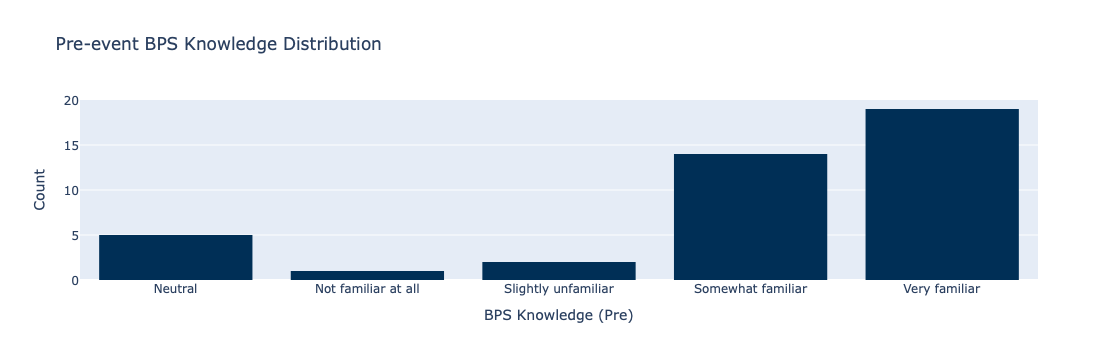

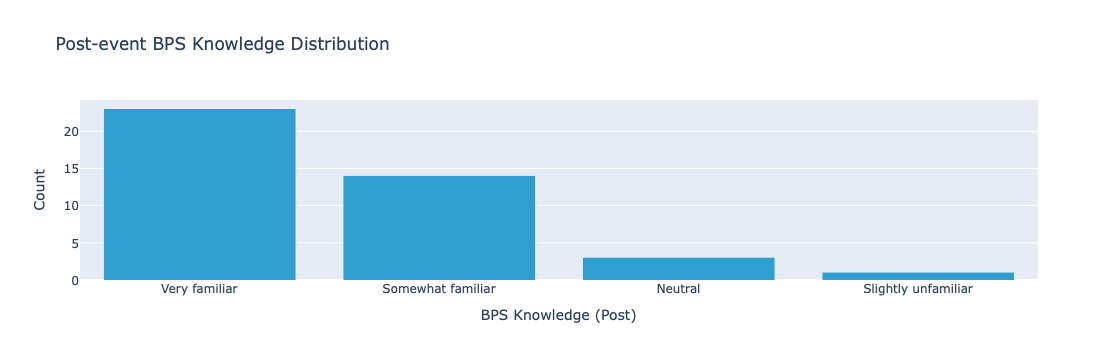

In [10]:
fig1 = px.histogram(
    merged_df,
    x="BPS_knowledge_pre",
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event BPS Knowledge Distribution"
)
fig1.update_layout(xaxis_title="BPS Knowledge (Pre)", yaxis_title="Count")
fig1.show()

fig2 = px.histogram(
    merged_df,
    x="BPS_knowledge_post",
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event BPS Knowledge Distribution"
)
fig2.update_layout(xaxis_title="BPS Knowledge (Post)", yaxis_title="Count")
fig2.show()


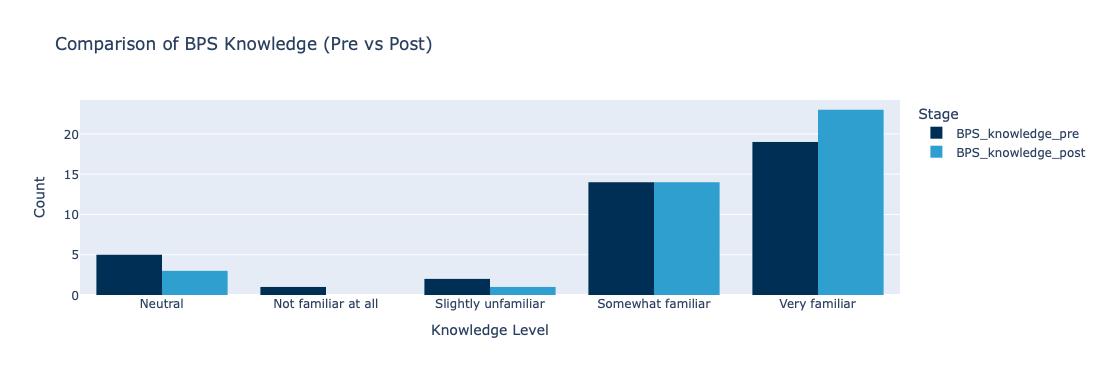

In [11]:
# Side-by-side comparison
comparison = merged_df.melt(
    id_vars=["name"], 
    value_vars=["BPS_knowledge_pre", "BPS_knowledge_post"],
    var_name="Stage", 
    value_name="Knowledge_Level"
)

fig3 = px.histogram(
    comparison,
    x="Knowledge_Level",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",   # blue
        "BPS_knowledge_post": "#2f9fd0"   # teal
    },
    title="Comparison of BPS Knowledge (Pre vs Post)"
)
fig3.update_layout(xaxis_title="Knowledge Level", yaxis_title="Count")
fig3.show()

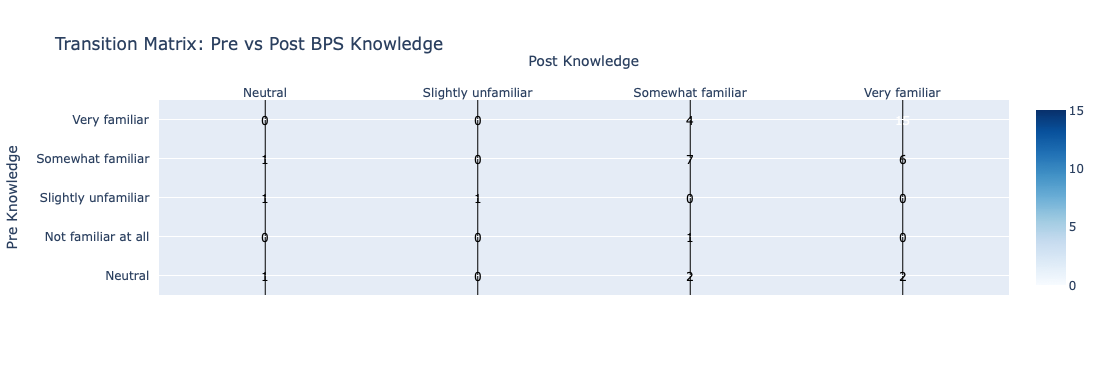

In [12]:
import pandas as pd
import plotly.figure_factory as ff

# Cross-tabulation
transition_matrix = pd.crosstab(
    merged_df["BPS_knowledge_pre"],
    merged_df["BPS_knowledge_post"]
)

# Heatmap style table
fig = ff.create_annotated_heatmap(
    z=transition_matrix.values,
    x=list(transition_matrix.columns),
    y=list(transition_matrix.index),
    colorscale="Blues",
    showscale=True
)
fig.update_layout(
    title="Transition Matrix: Pre vs Post BPS Knowledge",
    xaxis_title="Post Knowledge",
    yaxis_title="Pre Knowledge"
)
fig.show()


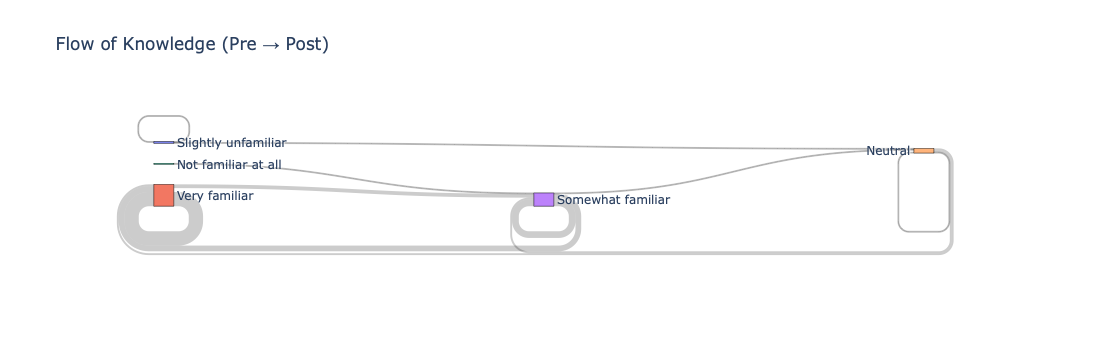

In [13]:
import plotly.graph_objects as go

# Get counts
transition_counts = merged_df.groupby(
    ["BPS_knowledge_pre", "BPS_knowledge_post"]
).size().reset_index(name="count")

# Map categories to indices
labels = list(set(transition_counts["BPS_knowledge_pre"]) | set(transition_counts["BPS_knowledge_post"]))
label_to_id = {label: i for i, label in enumerate(labels)}

# Build Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=transition_counts["BPS_knowledge_pre"].map(label_to_id),
        target=transition_counts["BPS_knowledge_post"].map(label_to_id),
        value=transition_counts["count"]
    )
)])
fig.update_layout(title="Flow of Knowledge (Pre → Post)", font_size=12)
fig.show()


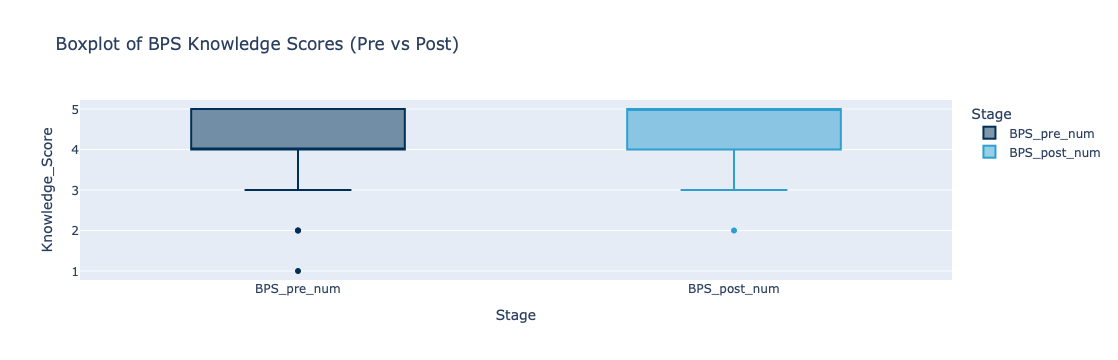

In [14]:
# Encode ordinal categories if needed
mapping = {
    "Not familiar at all": 1,
    "Slightly unfamiliar": 2,
    "Neutral": 3,
    "Somewhat familiar": 4,
    "Very familiar": 5
}

merged_df["BPS_pre_num"] = merged_df["BPS_knowledge_pre"].map(mapping)
merged_df["BPS_post_num"] = merged_df["BPS_knowledge_post"].map(mapping)

import plotly.express as px
fig = px.box(
    merged_df.melt(id_vars="name", value_vars=["BPS_pre_num", "BPS_post_num"],
                   var_name="Stage", value_name="Knowledge_Score"),
    x="Stage", y="Knowledge_Score", color="Stage",
    color_discrete_map={"BPS_pre_num": "#002f56", "BPS_post_num": "#2f9fd0"},
    title="Boxplot of BPS Knowledge Scores (Pre vs Post)"
)
fig.show()


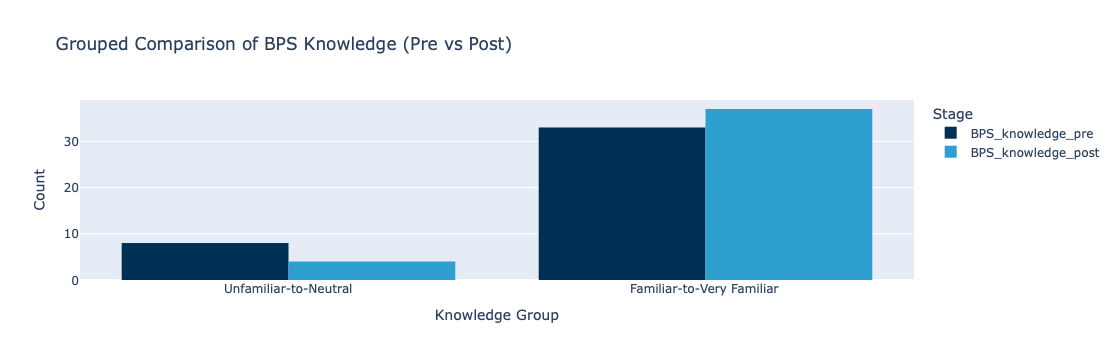

In [17]:
# Define grouping map
group_map = {
    "Not familiar at all": "Unfamiliar-to-Neutral",
    "Slightly unfamiliar": "Unfamiliar-to-Neutral",
    "Neutral": "Unfamiliar-to-Neutral",
    "Somewhat familiar": "Familiar-to-Very Familiar",
    "Very familiar": "Familiar-to-Very Familiar"
}

# Apply mapping
comparison["Knowledge_Group"] = comparison["Knowledge_Level"].map(group_map)

# Now plot grouped categories
fig = px.histogram(
    comparison,
    x="Knowledge_Group",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",   # blue
        "BPS_knowledge_post": "#2f9fd0"   # teal
    },
    title="Grouped Comparison of BPS Knowledge (Pre vs Post)"
)

fig.update_layout(xaxis_title="Knowledge Group", yaxis_title="Count")
fig.show()


In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import plotly.express as px

# Contingency table
contingency = pd.crosstab(
    comparison["Knowledge_Group"],
    comparison["Stage"]
)

print("Contingency Table:")
print(contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-square Test Results")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")


Contingency Table:
Stage                      BPS_knowledge_post  BPS_knowledge_pre
Knowledge_Group                                                 
Familiar-to-Very Familiar                  37                 33
Unfamiliar-to-Neutral                       4                  8

Chi-square Test Results
Chi2 statistic = 0.8786
Degrees of freedom = 1
P-value = 0.3486


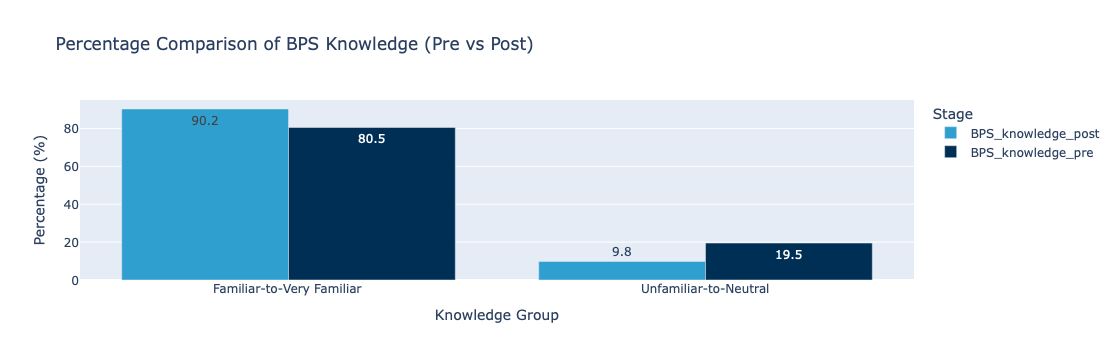

In [19]:
contingency_pct = contingency.div(contingency.sum(axis=0), axis=1) * 100

fig_pct = px.bar(
    contingency_pct,
    barmode="group",
    text_auto=".1f",
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",
        "BPS_knowledge_post": "#2f9fd0"
    },
    title="Percentage Comparison of BPS Knowledge (Pre vs Post)"
)

fig_pct.update_layout(
    xaxis_title="Knowledge Group",
    yaxis_title="Percentage (%)",
    legend_title="Stage"
)

fig_pct.show()


In [20]:
merged_df.columns

Index(['Respondent ID_x', 'Collector ID_x', 'Start Date_x', 'End Date_x',
       'IP Address_x', 'name', 'ID#_x', 'location_x',
       'participation_frequency', 'age_group', 'profession', 'Unnamed: 11',
       'training_level', 'recieved_training_IDD', 'has_experience_IDD',
       'experience_IDD_count', 'interaction_frequency_IDD',
       'comfort_level_IDD_pre', 'PersonCenteredCare_InPractice_pre',
       'BPS_knowledge_pre', 'SBAR_familiar_pre', 'familiar_with_OT_pre',
       'familiar_with_IPC_pre', 'prep_for_collaboration_pre',
       'prior_IPC_experience_pre', 'yes_other', 'Unnamed: 26_x',
       'Unnamed: 27_x', 'prior_IPC_experience_time',
       'frequency_collaboration_pre',
       'How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?',
       'Respondent ID_y', 'Collector ID_y', 'Start Date_y', 'End Date_y',
       'IP Address_y', 'Unnamed: 5', 'ID#_y', 'location_y', 'new_exposure_IDD',
       'comfort_le

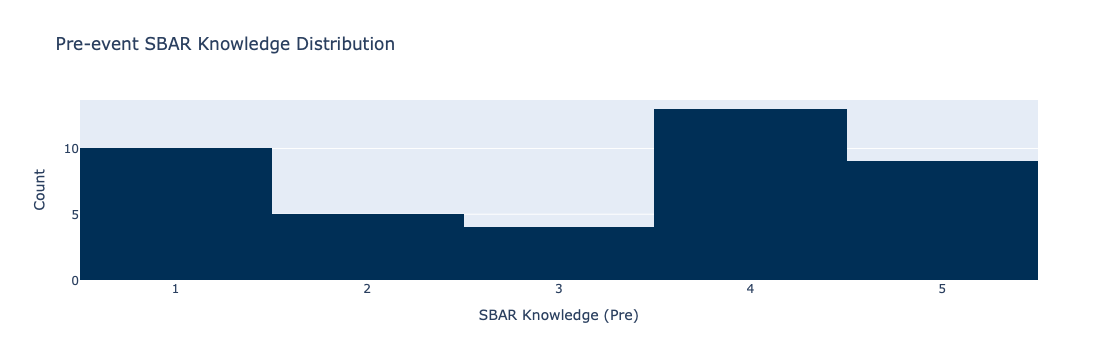

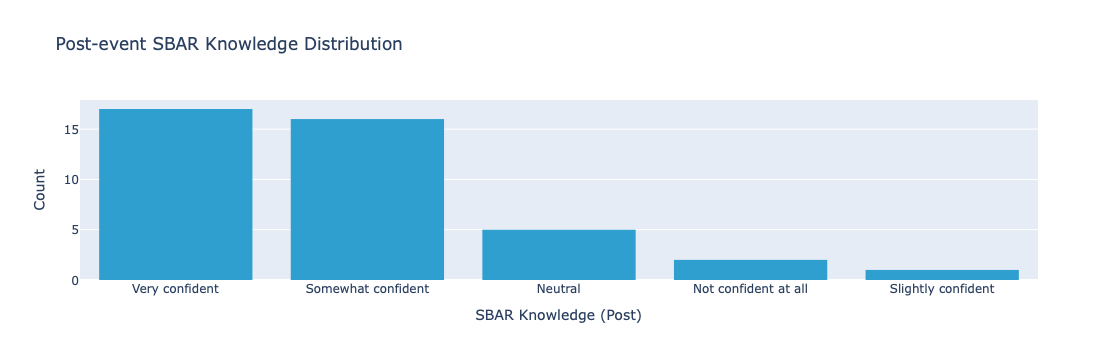

In [22]:
fig1 = px.histogram(
    merged_df,
    x="SBAR_familiar_pre",
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event SBAR Knowledge Distribution"
)
fig1.update_layout(xaxis_title="SBAR Knowledge (Pre)", yaxis_title="Count")
fig1.show()

fig2 = px.histogram(
    merged_df,
    x="SBAR_familiar_post",
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event SBAR Knowledge Distribution"
)
fig2.update_layout(xaxis_title="SBAR Knowledge (Post)", yaxis_title="Count")
fig2.show()


In [32]:
# Example: count frequencies in column 'a'
count_dict = merged_df["SBAR_familiar_pre"].value_counts().to_dict()

print(count_dict)
print(sum(count_dict.values()))


{4: 13, 1: 10, 5: 9, 2: 5, 3: 4}
41


In [33]:
# 5-Very confident 
# 4-Somewhat confident
# 3 -Neutral
# 2 - Slightly confident
# 1 = Not confident at all

In [30]:
count_dic = merged_df["SBAR_familiar_post"].value_counts().to_dict()

print(count_dic)

{'Very confident': 17, 'Somewhat confident': 16, 'Neutral': 5, 'Not confident at all': 2, 'Slightly confident': 1}


In [36]:
# Define mapping
sbar_map = {
    1: "Not confident at all",
    2: "Slightly confident",
    3: "Neutral",
    4: "Somewhat confident",
    5: "Very confident"
}

# Apply mapping to pre and post
merged_df["SBAR_familiar_pre_label"] = merged_df["SBAR_familiar_pre"].map(sbar_map)



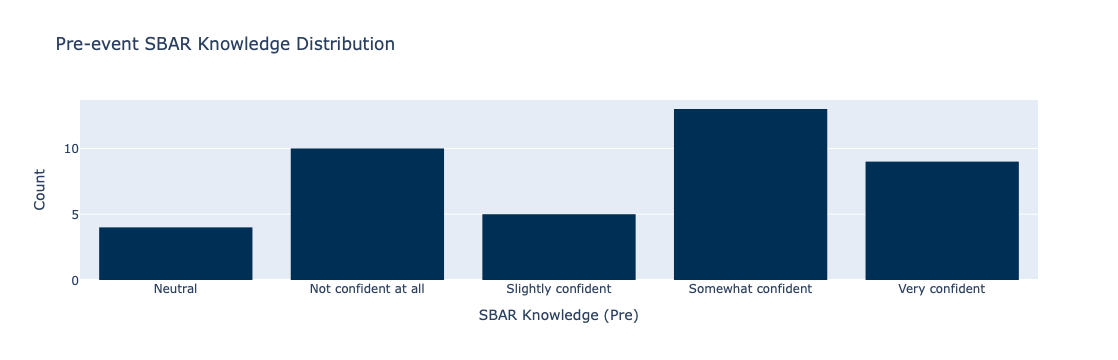

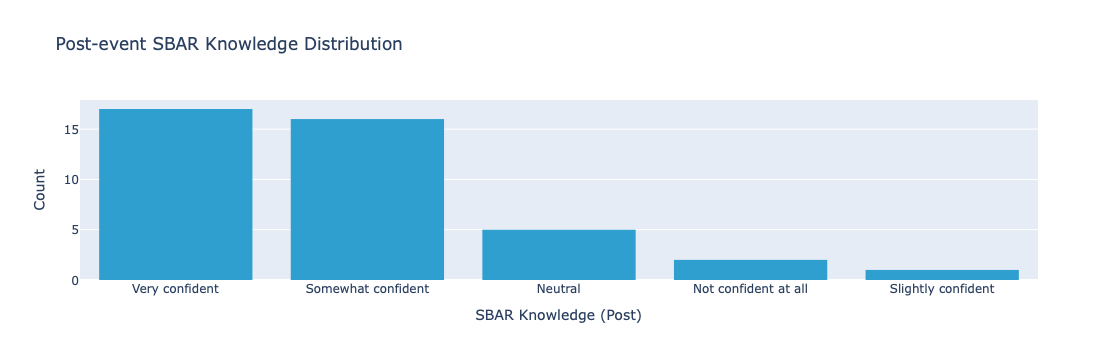

In [37]:
fig1 = px.histogram(
    merged_df,
    x="SBAR_familiar_pre_label",
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event SBAR Knowledge Distribution"
)
fig1.update_layout(xaxis_title="SBAR Knowledge (Pre)", yaxis_title="Count")
fig1.show()

fig2 = px.histogram(
    merged_df,
    x="SBAR_familiar_post",
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event SBAR Knowledge Distribution"
)
fig2.update_layout(xaxis_title="SBAR Knowledge (Post)", yaxis_title="Count")
fig2.show()


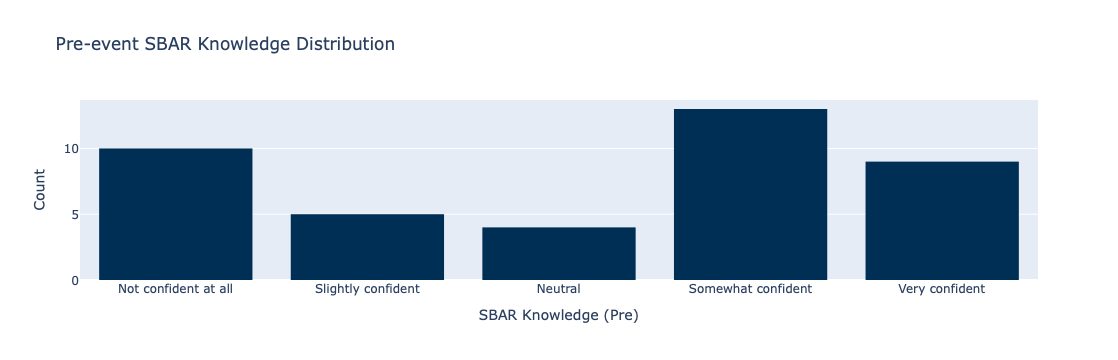

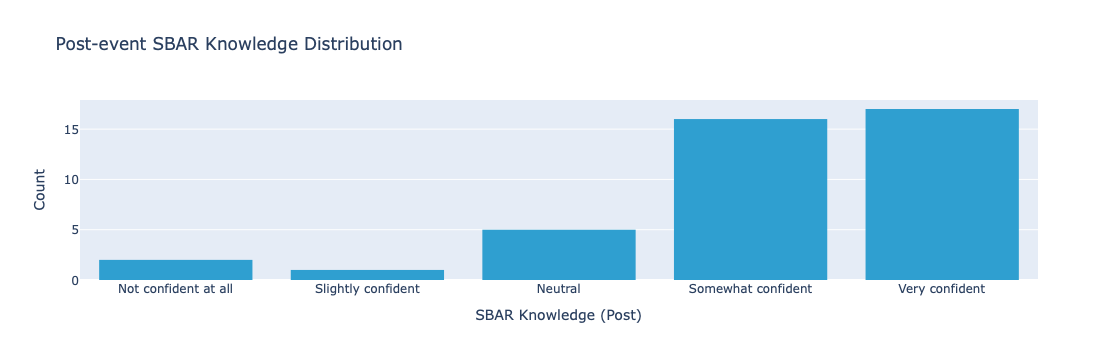

In [39]:
import plotly.express as px

# Define category order
sbar_order = [
    "Not confident at all",
    "Slightly confident",
    "Neutral",
    "Somewhat confident",
    "Very confident"
]

# Pre-event
fig1 = px.histogram(
    merged_df,
    x="SBAR_familiar_pre_label",
    category_orders={"SBAR_familiar_pre_label": sbar_order},
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event SBAR Knowledge Distribution"
)
fig1.update_layout(xaxis_title="SBAR Knowledge (Pre)", yaxis_title="Count")
fig1.show()

# Post-event
fig2 = px.histogram(
    merged_df,
    x="SBAR_familiar_post",
    category_orders={"SBAR_familiar_post": sbar_order},
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event SBAR Knowledge Distribution"
)
fig2.update_layout(xaxis_title="SBAR Knowledge (Post)", yaxis_title="Count")
fig2.show()


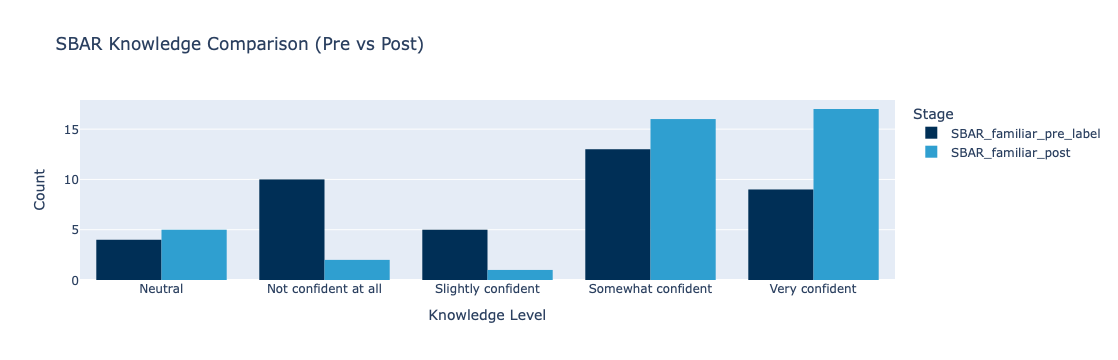

In [41]:

# Side-by-side comparison
sbar_comparison = merged_df.melt(
    id_vars=["name"], 
    value_vars=["SBAR_familiar_pre_label", "SBAR_familiar_post"],
    var_name="Stage", 
    value_name="SBAR Knowledge_Level"
)

fig3 = px.histogram(
    sbar_comparison,
    x="SBAR Knowledge_Level",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "SBAR_familiar_pre_label": "#002f56",   # blue
        "SBAR_familiar_post": "#2f9fd0"   # teal
    },
    title="SBAR Knowledge Comparison (Pre vs Post)"
)
fig3.update_layout(xaxis_title="Knowledge Level", yaxis_title="Count")
fig3.show()

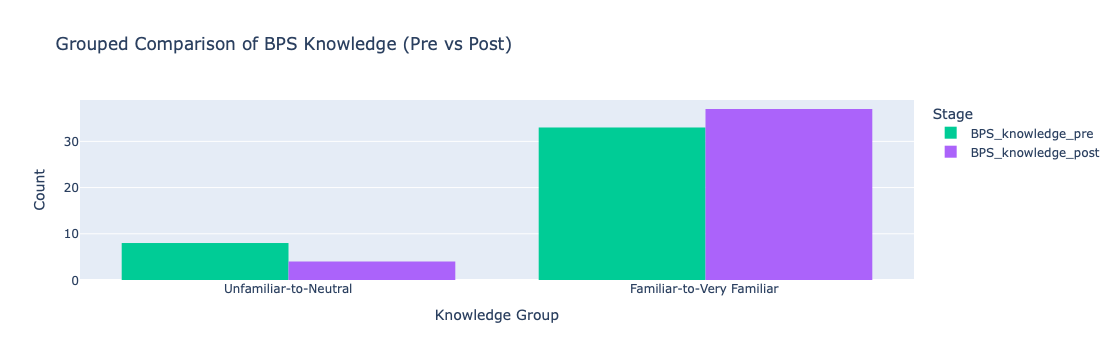

In [60]:
# Define grouping map
group_map = {
    "Not confident at all":"not-confident",
    "Slightly confident":"confident",
    "Neutral":"not-confident",
    "Somewhat confident":"confident",
    "Very confident":"condfident"
}

# Apply mapping
sbar_comparison["SBAR Knowledge_Group"] = sbar_comparison["SBAR Knowledge_Level"].map(group_map)

# Now plot grouped categories
fig = px.histogram(
    comparison,
    x="Knowledge_Group",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "SBAR_knowledge_pre_label": "#002f56",   # blue
        "SBAR_knowledge_post": "#2f9fd0"   # teal
    },
    title="Grouped Comparison of BPS Knowledge (Pre vs Post)"
)

fig.update_layout(xaxis_title="Knowledge Group", yaxis_title="Count")
fig.show()

In [44]:
import pandas as pd
from scipy.stats import chi2_contingency
import plotly.express as px

# Contingency table
contingency = pd.crosstab(
    sbar_comparison["SBAR Knowledge_Group"],
    sbar_comparison["Stage"]
)

print("Contingency Table:")
print(contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-square Test Results")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")


Contingency Table:
Stage                 SBAR_familiar_post  SBAR_familiar_pre_label
SBAR Knowledge_Group                                             
condfient                             17                        9
confident                             17                       18
not-confident                          7                       14

Chi-square Test Results
Chi2 statistic = 4.8234
Degrees of freedom = 2
P-value = 0.0897


In [48]:
# merged_df.columns
count_d = merged_df["profession"].value_counts().to_dict()

print(count_d)

{'Occupational Therapist Student': 20, 'Hygenist': 6, 'Occupational Therapist': 6, 'Dental Student': 4, 'Dentist': 3, 'Hygiene Student': 1, 'Other (please specify)': 1}


In [49]:
# Define professions to drop
drop_list = ["Occupational Therapist Student", "Occupational Therapist", "Other (please specify)"]

df_filtered = merged_df[~merged_df["profession"].isin(drop_list)]

# Quick check of counts
print(df_filtered["profession"].value_counts())


profession
Hygenist           6
Dental Student     4
Dentist            3
Hygiene Student    1
Name: count, dtype: int64


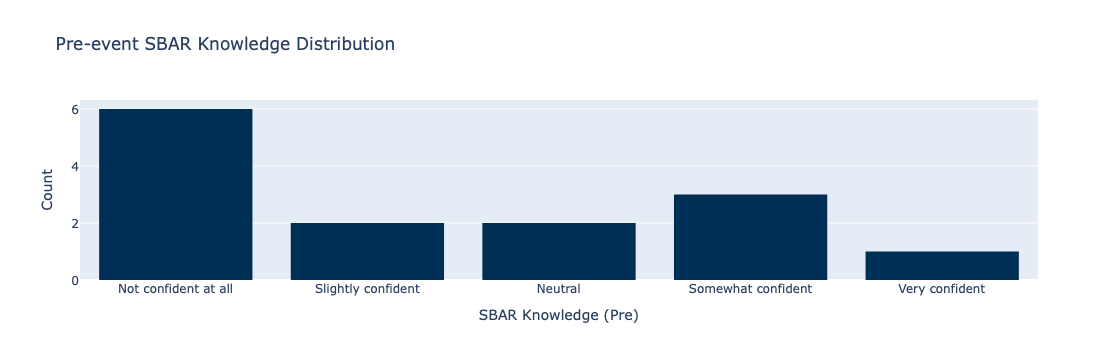

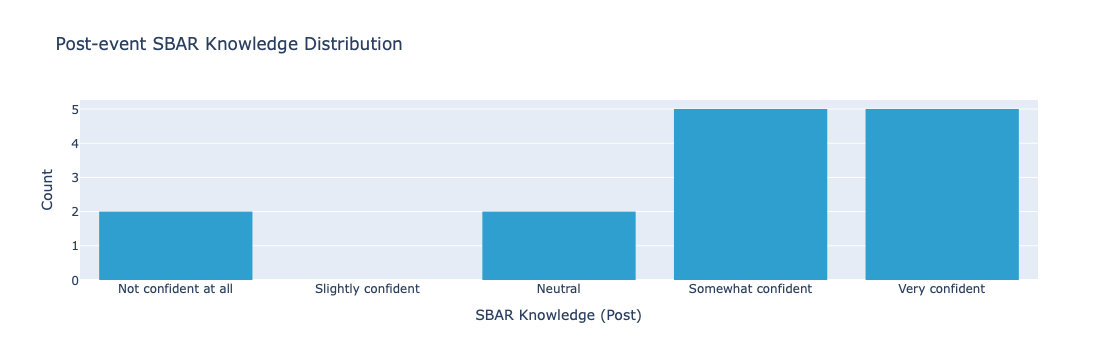

In [51]:
import plotly.express as px

# Define category order
sbar_order = [
    "Not confident at all",
    "Slightly confident",
    "Neutral",
    "Somewhat confident",
    "Very confident"
]

# Pre-event
fig1 = px.histogram(
    df_filtered,
    x="SBAR_familiar_pre_label",
    category_orders={"SBAR_familiar_pre_label": sbar_order},
    color_discrete_sequence=["#002f56"],  # UB blue
    title="Pre-event SBAR Knowledge Distribution"
)
fig1.update_layout(xaxis_title="SBAR Knowledge (Pre)", yaxis_title="Count")
fig1.show()

# Post-event
fig2 = px.histogram(
    df_filtered,
    x="SBAR_familiar_post",
    category_orders={"SBAR_familiar_post": sbar_order},
    color_discrete_sequence=["#2f9fd0"],  # UB teal
    title="Post-event SBAR Knowledge Distribution"
)
fig2.update_layout(xaxis_title="SBAR Knowledge (Post)", yaxis_title="Count")
fig2.show()


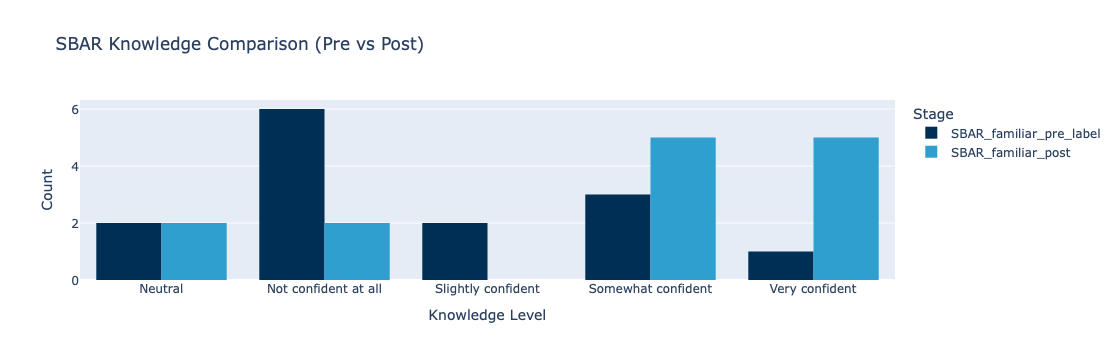

In [52]:

# Side-by-side comparison
sbar_comparison_f = df_filtered.melt(
    id_vars=["name"], 
    value_vars=["SBAR_familiar_pre_label", "SBAR_familiar_post"],
    var_name="Stage", 
    value_name="SBAR Knowledge_Level"
)

fig3 = px.histogram(
    sbar_comparison_f,
    x="SBAR Knowledge_Level",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "SBAR_familiar_pre_label": "#002f56",   # blue
        "SBAR_familiar_post": "#2f9fd0"   # teal
    },
    title="SBAR Knowledge Comparison (Pre vs Post)"
)
fig3.update_layout(xaxis_title="Knowledge Level", yaxis_title="Count")
fig3.show()

In [61]:
# Define grouping map
group_map = {
    "Not confident at all":"not-confident",
    "Slightly confident":"confident",
    "Neutral":"not-confident",
    "Somewhat confident":"confident",
    "Very confident":"condfident"
}

# Apply mapping
sbar_comparison_f["SBAR Knowledge_Group"] = sbar_comparison["SBAR Knowledge_Level"].map(group_map)

# Now plot grouped categories
fig = px.histogram
(
    sbar_comparison_f,
    x = "SBAR Knowledge_Level",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "SBAR_knowledge_pre_label": "#002f56",   
        "SBAR_knowledge_post": "#2f9fd0",
    },
    title="Grouped Comparison of BPS Knowledge (Pre vs Post)"
)

fig.update_layout(xaxis_title="SBAR Knowledge Group", yaxis_title="Count")
fig.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2050944184.py, line 17)

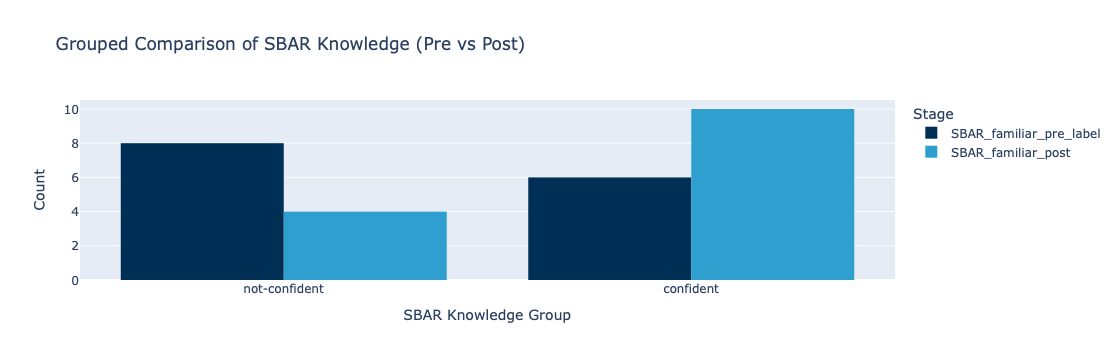

In [62]:
import plotly.express as px

# Fix mapping
group_map = {
    "Not confident at all": "not-confident",
    "Slightly confident": "confident",
    "Neutral": "not-confident",
    "Somewhat confident": "confident",
    "Very confident": "confident"
}

# Apply mapping
sbar_comparison_f["SBAR Knowledge_Group"] = sbar_comparison_f["SBAR Knowledge_Level"].map(group_map)

# Plot grouped categories
fig = px.histogram(
    sbar_comparison_f,
    x="SBAR Knowledge_Group",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "SBAR_familiar_pre_label": "#002f56",   # blue
        "SBAR_familiar_post": "#2f9fd0",  # teal
    },
    title="Grouped Comparison of SBAR Knowledge (Pre vs Post)"
)

fig.update_layout(xaxis_title="SBAR Knowledge Group", yaxis_title="Count")
fig.show()


In [63]:
import pandas as pd
from scipy.stats import chi2_contingency
import plotly.express as px

# Contingency table
contingency = pd.crosstab(
    sbar_comparison_f["SBAR Knowledge_Group"],
    sbar_comparison_f["Stage"]
)

print("Contingency Table:")
print(contingency)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-square Test Results")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")


Contingency Table:
Stage                 SBAR_familiar_post  SBAR_familiar_pre_label
SBAR Knowledge_Group                                             
confident                             10                        6
not-confident                          4                        8

Chi-square Test Results
Chi2 statistic = 1.3125
Degrees of freedom = 1
P-value = 0.2519


In [67]:
post_final["SBAR_familiar_post"].value_counts()
# post_final.columns

SBAR_familiar_post
Very confident          18
Somewhat confident      16
Neutral                  6
Not confident at all     2
Slightly confident       1
Name: count, dtype: int64

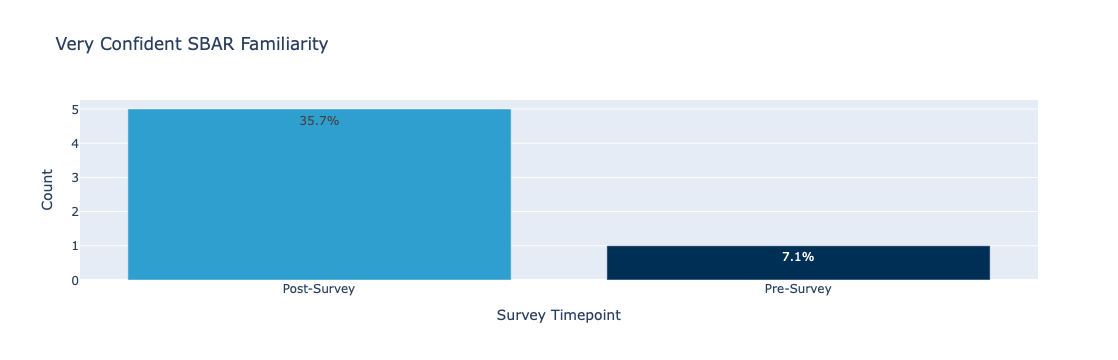

In [68]:
import plotly.express as px

# Filter only "Very confident"
sbar_confident = sbar_comparison_f[sbar_comparison_f["SBAR Knowledge_Level"] == "Very confident"]

# Count occurrences
counts = sbar_confident["Stage"].value_counts().reset_index()
counts.columns = ["Stage", "Count"]

# Compute percentages
total = sbar_comparison_f["Stage"].value_counts()
counts["Percentage"] = counts.apply(lambda row: (row["Count"] / total[row["Stage"]]) * 100, axis=1)

# Map nicer stage labels for x-axis
stage_labels = {
    "SBAR_familiar_pre_label": "Pre-Survey",
    "SBAR_familiar_post": "Post-Survey"
}
counts["Stage"] = counts["Stage"].map(stage_labels)

# Plot bar chart with count on y-axis and % as text
fig = px.bar(
    counts,
    x="Stage",
    y="Count",
    text=counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    color="Stage",
    color_discrete_map={"Pre-Survey": "#002f56", "Post-Survey": "#2f9fd0"},
    title="Very Confident SBAR Familiarity"
)

fig.update_layout(
    xaxis_title="Survey Timepoint",
    yaxis_title="Count",
    showlegend=False
)

fig.show()


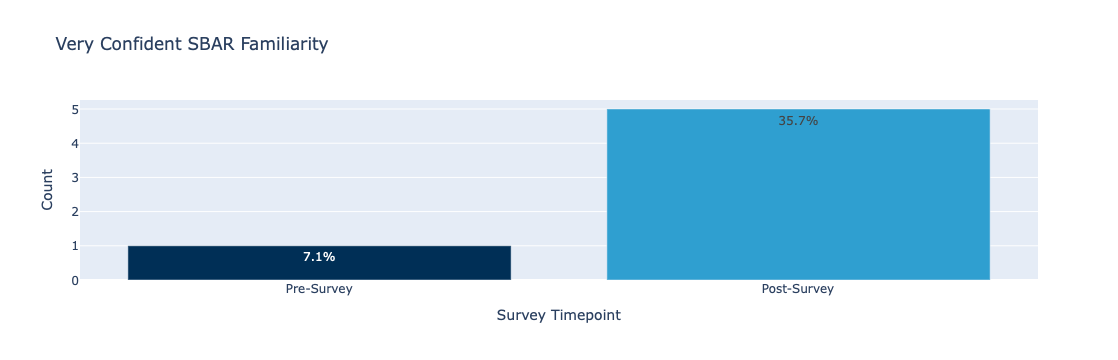

In [69]:
fig = px.bar(
    counts,
    x="Stage",
    y="Count",
    text=counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    color="Stage",
    category_orders={"Stage": ["Pre-Survey", "Post-Survey"]},  # 👈 enforce order
    color_discrete_map={"Pre-Survey": "#002f56", "Post-Survey": "#2f9fd0"},
    title="Very Confident SBAR Familiarity"
)

fig.update_layout(
    xaxis_title="Survey Timepoint",
    yaxis_title="Count",
    showlegend=False
)

fig.show()


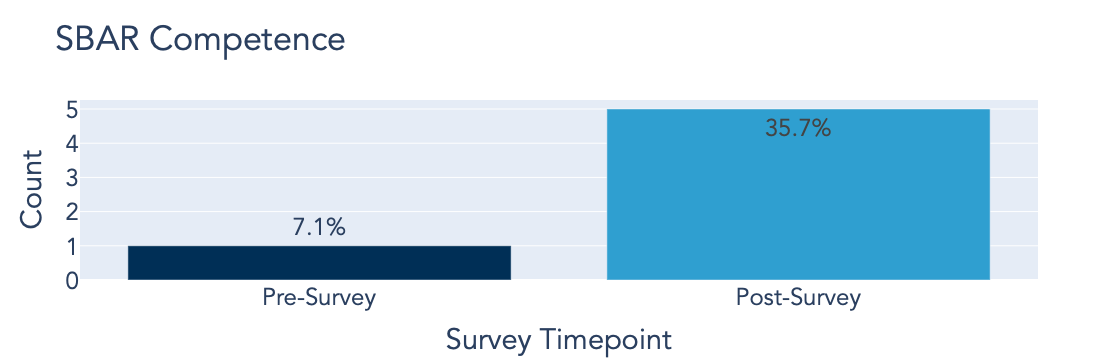

In [71]:
fig = px.bar(
    counts,
    x="Stage",
    y="Count",
    text=counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    color="Stage",
    category_orders={"Stage": ["Pre-Survey", "Post-Survey"]},
    color_discrete_map={"Pre-Survey": "#002f56", "Post-Survey": "#2f9fd0"},
    title="SBAR Competence"
)

fig.update_layout(
    xaxis_title="Survey Timepoint",
    yaxis_title="Count",
    showlegend=False,
    font=dict(
        family="Avenir",   # 👈 font
        size=24            # 👈 size
    )
)

fig.show()


In [75]:
# Filter only rows where pre-survey SBAR is 'Very confident'
very_confident_df_pre = merged_df[merged_df["SBAR_familiar_pre_label"] == "Very confident"]

# Quick check
print(very_confident_df_pre.shape)
print(very_confident_df_pre[["name", "SBAR_familiar_pre_label", "SBAR_familiar_post_label"]].head())


(9, 68)
   name SBAR_familiar_pre_label SBAR_familiar_post_label
22   CR          Very confident                      NaN
23   HL          Very confident                      NaN
24   IW          Very confident                      NaN
25   JS          Very confident                      NaN
26   LH          Very confident                      NaN


In [76]:
# Filter only rows where pre-survey SBAR is 'Very confident'
very_confident_df_post = merged_df[merged_df["SBAR_familiar_post"] == "Very confident"]

# Quick check
print(very_confident_df_post.shape)
print(very_confident_df_post[["name", "SBAR_familiar_post"]].head())


(17, 68)
  name SBAR_familiar_post
0   MO     Very confident
2   AO     Very confident
5   GW     Very confident
8   AM     Very confident
9   DS     Very confident


0    41
1    41
2    41
3    41
4    41
5    41
6    41
7    41
8    41
9    41
Name: Count, dtype: int64


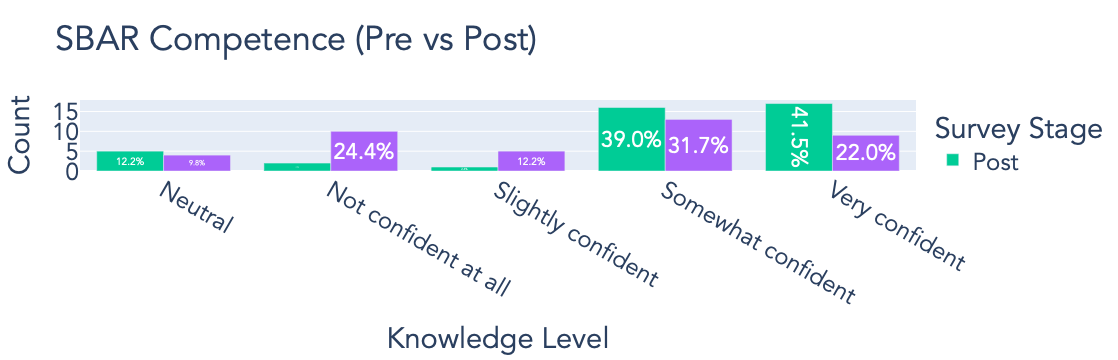

In [116]:
import plotly.express as px

# Calculate percentages for each group
sbar_counts = sbar_comparison.groupby(["Stage", "SBAR Knowledge_Level"]).size().reset_index(name="Count")
sbar_totals = sbar_counts.groupby("Stage")["Count"].transform("sum")
print(sbar_totals)
sbar_counts["Percentage"] = (sbar_counts["Count"] / sbar_totals) * 100

# Plot
fig3 = px.bar(
    sbar_counts,
    x="SBAR Knowledge_Level",
    y="Count",
    color="Stage",
    barmode="group",
    text=sbar_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    color_discrete_map={
        "SBAR_familiar_pre_label": "#002f56",   # blue
        "SBAR_familiar_post": "#2f9fd0"        # teal
    },
    title="SBAR Competence (Pre vs Post)"
)

# Update layout & styling
fig3.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"), 
    textposition="inside", 
    insidetextanchor="middle"
)

fig3.update_layout(
    xaxis_title="Knowledge Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage"
)

fig3.show()


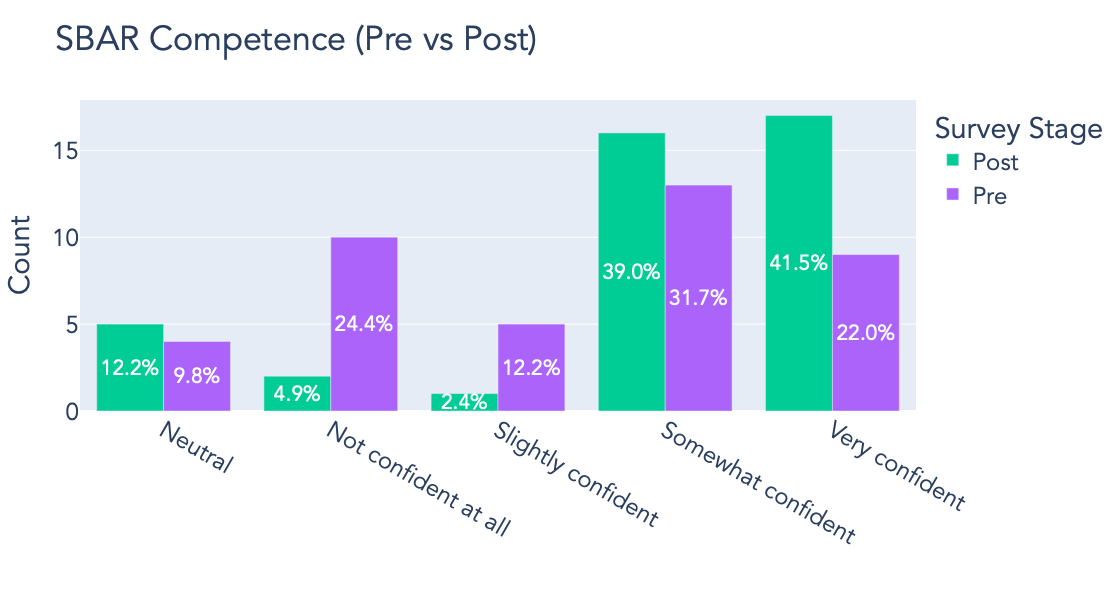

In [117]:
fig3.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"),  # 👈 fixed size
    textposition="inside",
    textangle=0,  # horizontal (landscape)
    insidetextanchor="middle"
)

fig3.update_layout(
    xaxis_title="",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,   # 👈 ensures text doesn’t shrink
    uniformtext_mode="show",  # 👈 always show text, even if crowded
    width=1000,
    height=600
)


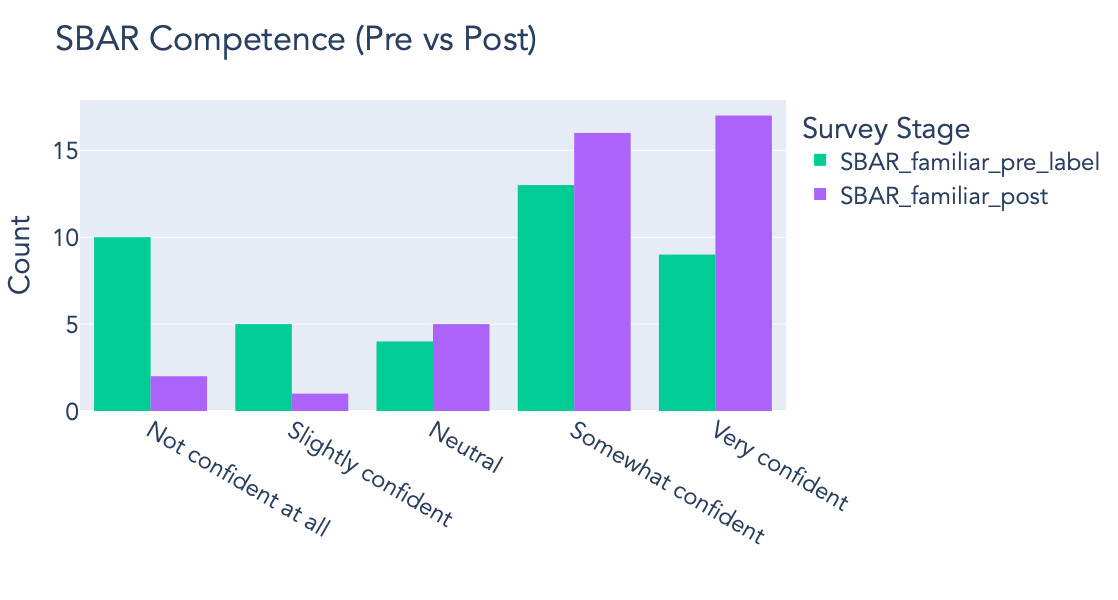

In [91]:
# Define order of Likert scale
sbar_order = [
    "Not confident at all",
    "Slightly confident",
    "Neutral",
    "Somewhat confident",
    "Very confident"
]

fig3.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"),  # 👈 fixed size
    textposition="inside",
    textangle=0,  # horizontal (landscape)
    insidetextanchor="middle"
)

fig3.update_layout(
    xaxis_title="",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,   # 👈 ensures text doesn’t shrink
    uniformtext_mode="show",  # 👈 always show text, even if crowded
    width=1000,
    height=600
)


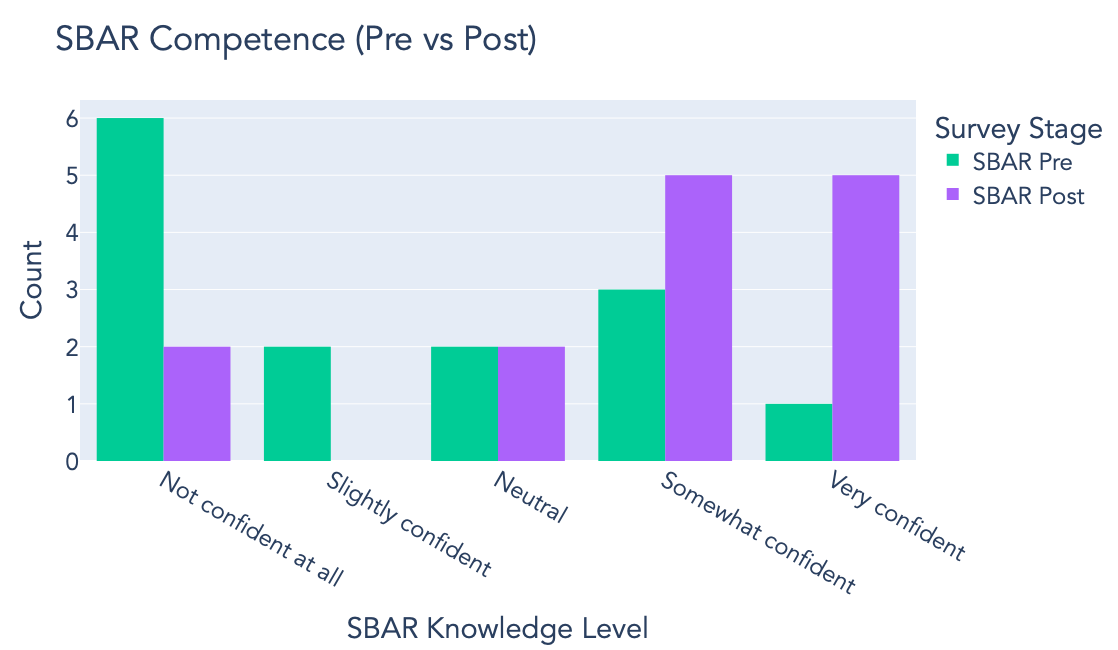

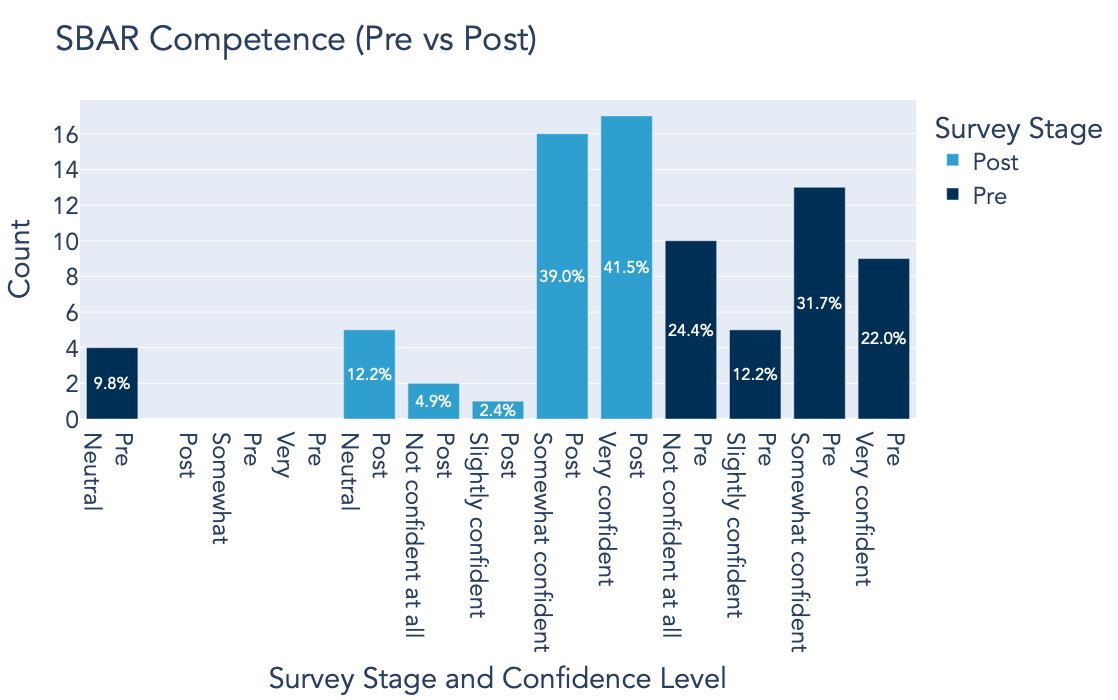

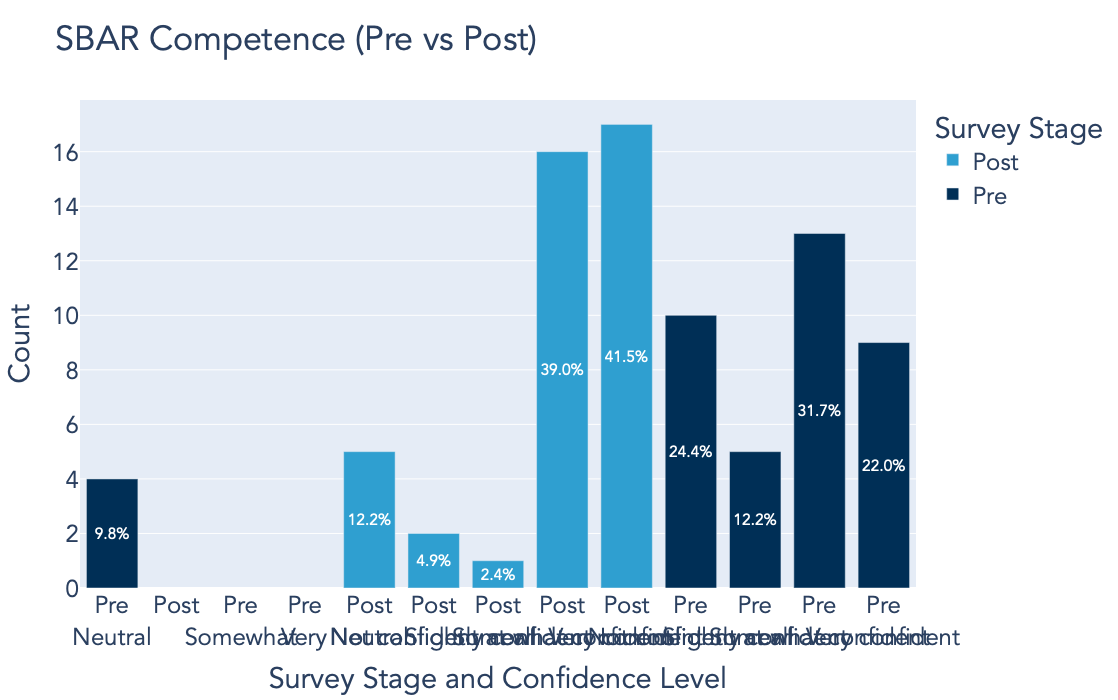

In [103]:
import plotly.express as px

# Build combined axis labels with line break
sbar_counts["Stage_Level"] = sbar_counts["Stage"] + "<br>" + sbar_counts["SBAR Knowledge_Level"]

# Define order with nested Pre/Post under each Likert
sbar_order = [
    "Pre<br>Not confident", "Post<br>at all",
    "Pre<br>Slightly", "Post<br>confident",
    "Pre<br>Neutral", "Post<br>",
    "Pre<br>Somewhat", "Post<br>confident",
    "Pre<br>Very", "Post<br>confident"
]

# Plot
fig6 = px.bar(
    sbar_counts,
    x="Stage_Level",
    y="Count",
    color="Stage",
    text=sbar_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    category_orders={"Stage_Level": sbar_order},
    color_discrete_map={"Pre": "#002f56", "Post": "#2f9fd0"},
    title="SBAR Competence (Pre vs Post)"
)

# Styling
fig6.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"),
    textposition="inside",
    textangle=0,
    insidetextanchor="middle"
)

fig6.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700
)

fig6.show()
fig6.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700,
    xaxis=dict(
        tickangle=0   # 👈 keep labels horizontal
    )
)


In [ ]:
import plotly.express as px

# Build combined axis labels with line break
sbar_counts["Stage_Level"] = sbar_counts["Stage"] + "<br>" + sbar_counts["SBAR Knowledge_Level"]

# Define order with nested Pre/Post under each Likert
sbar_order = [
    "Pre<br>Not confident", "Post<br>at all",
    "Pre<br>Slightly", "Post<br>confident",
    "Pre<br>Neutral", "Post<br>",
    "Pre<br>Somewhat", "Post<br>confident",
    "Pre<br>Very", "Post<br>confident"
]

# Plot
fig6 = px.bar(
    sbar_counts,
    x="Stage_Level",
    y="Count",
    color="Stage",
    text=sbar_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    category_orders={"Stage_Level": sbar_order},
    color_discrete_map={"Pre": "#002f56", "Post": "#2f9fd0"},
    title="SBAR Competence (Pre vs Post)"
)

# Styling
fig6.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"),
    textposition="inside",
    textangle=0,
    insidetextanchor="middle"
)

fig6.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700
)

fig6.show()
fig6.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700,
    xaxis=dict(
        tickangle=0   # 👈 keep labels horizontal
    )
)


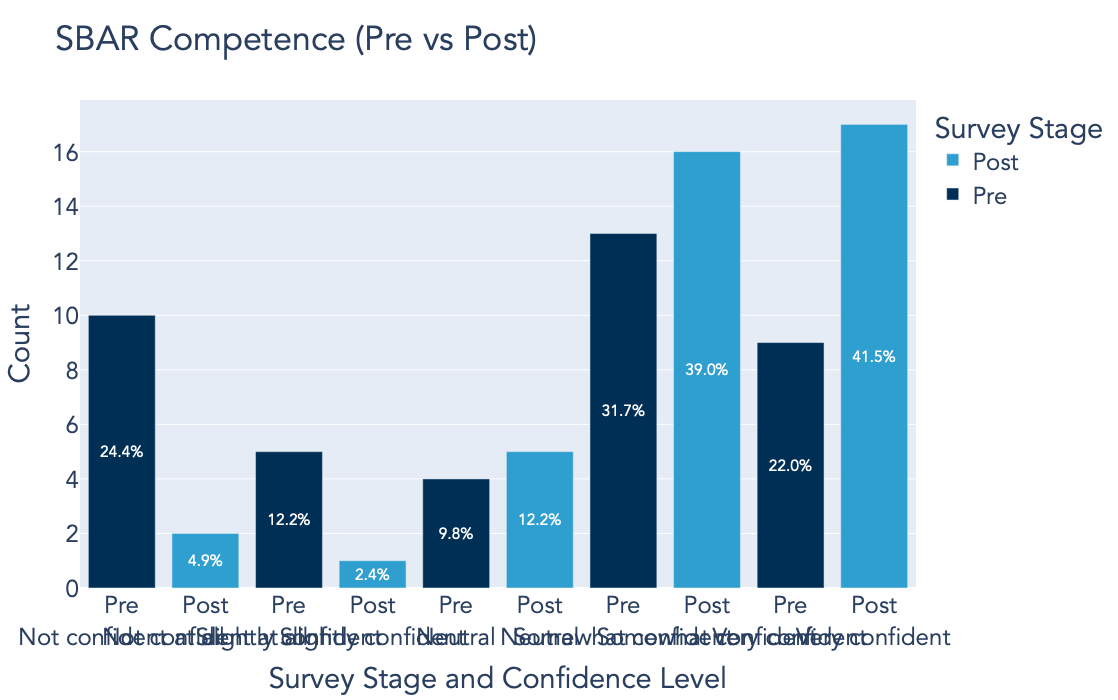

In [104]:
fig7.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700,
    xaxis=dict(
        tickangle=0   # 👈 keep labels horizontal
    )
)


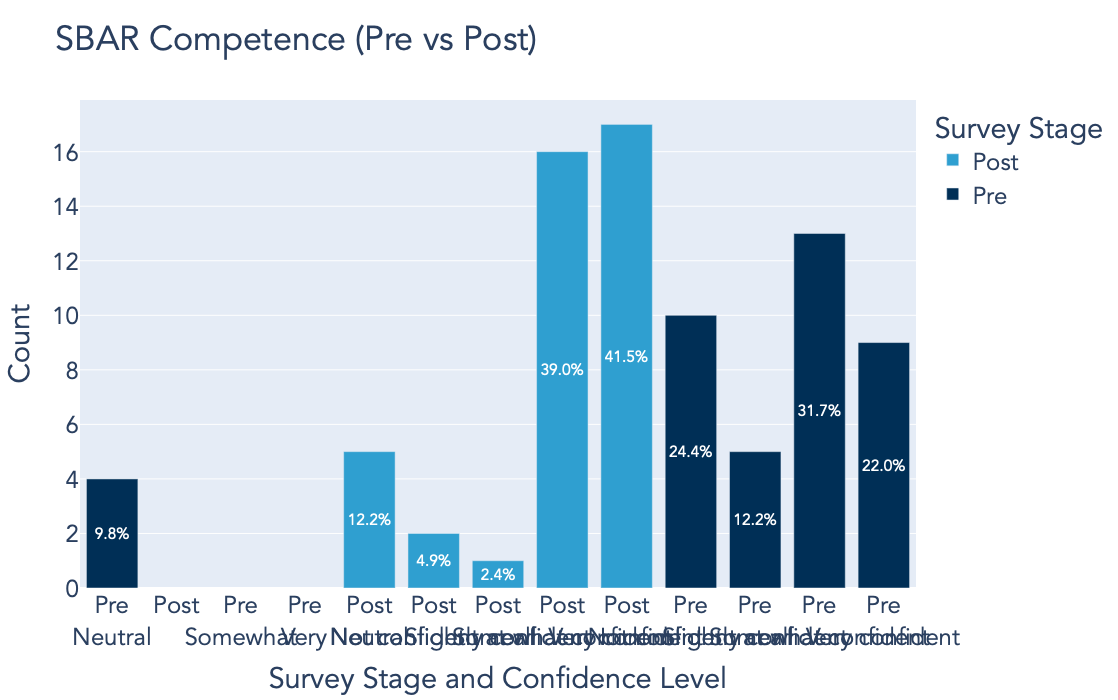

In [124]:
import plotly.express as px

# Build combined axis labels with line break
sbar_counts["Stage_Level"] = sbar_counts["Stage"] + "<br>" + sbar_counts["SBAR Knowledge_Level"]

# Define order with nested Pre/Post under each Likert
sbar_order = [
    "Pre<br>Not confident", "Post<br>at all",
    "Pre<br>Slightly", "Post<br>confident",
    "Pre<br>Neutral", "Post<br>",
    "Pre<br>Somewhat", "Post<br>confident",
    "Pre<br>Very", "Post<br>confident"
]

# Plot
fig16 = px.bar(
    sbar_counts,
    x="Stage_Level",
    y="Count",
    color="Stage",
    text=sbar_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    category_orders={"Stage_Level": sbar_order},
    color_discrete_map={"Pre": "#002f56", "Post": "#2f9fd0"},
    title="SBAR Competence (Pre vs Post)"
)

# Styling
fig16.update_traces(
    textfont=dict(family="Avenir", size=24, color="white"),
    textposition="inside",
    textangle=0,
    insidetextanchor="middle"
)

fig16.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700
)

# fig16.show()
fig16.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700,
    xaxis=dict(
        tickangle=0   # 👈 keep labels horizontal
    )
)


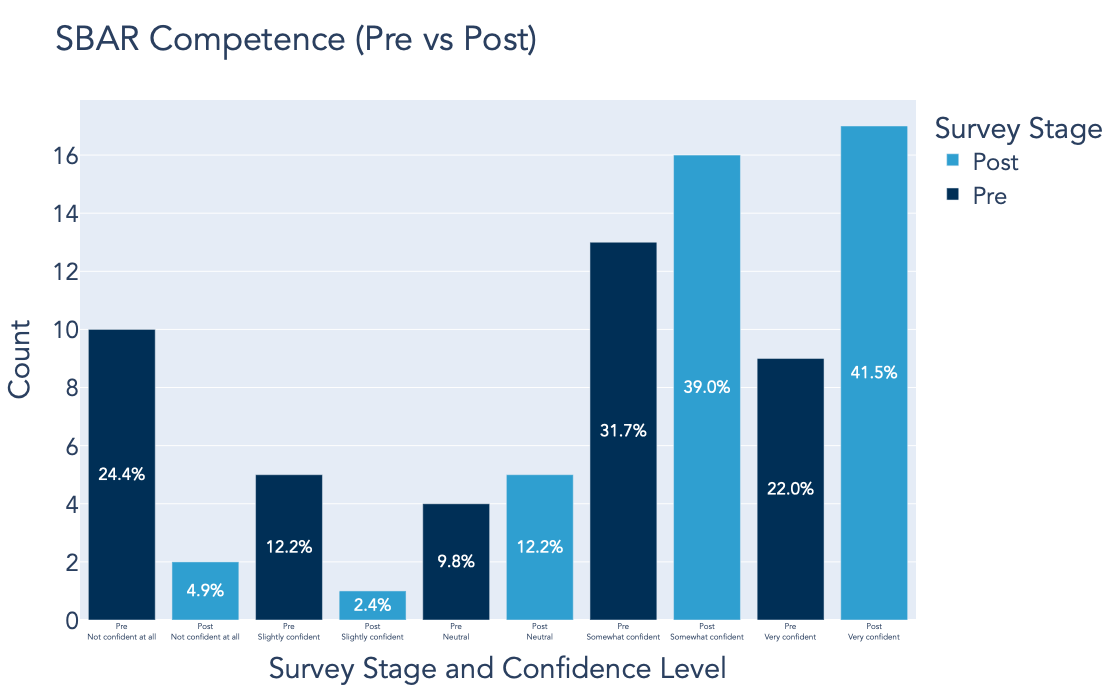

In [123]:
fig7.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1100,
    height=700,
    xaxis=dict(
        tickangle=0,   # 👈 keep labels horizontal,
        tickfont=dict(size=8, family="Avenir")  
    )
)


In [125]:
merged_df

,Respondent ID_x,Collector ID_x,Start Date_x,End Date_x,IP Address_x,name,ID#_x,location_x,participation_frequency,age_group,...,IPC_value_post,has_experience_event,interest_in_future_events,IPC_negative_impact,child_response_IPC,suggestion,BPS_pre_num,BPS_post_num,SBAR_familiar_pre_label,SBAR_familiar_post_label
0,1.150000e+11,435224173,2025-04-04 9:03:55,2025-04-04 9:07:55,174.208.33.96,MO,33,Buffalo,This is my first time,35-44,...,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,I would suggest to keep one extra hygiene chai...,3,5,Neutral,NaN
1,1.150000e+11,435224173,2025-09-04 10:44:21,2025-09-04 10:47:55,172.98.137.25,AG,2,Kansas City,This is my first time,25-34,...,Somewhat valuable,Good,Yes,"No, not at all",Very positively,No comment,3,4,Not confident at all,NaN
2,1.150000e+11,435224173,2025-04-04 9:04:03,2025-04-04 9:08:35,151.181.86.221,AO,6,Buffalo,3-5 times,35-44,...,Extremely valuable,Excellent,Yes,"Yes, somewhat",Very positively,NaN,3,5,Not confident at all,NaN
3,1.150000e+11,435224173,2025-04-04 9:02:25,2025-04-04 9:06:04,174.208.33.106,JO,21,Buffalo,This is my first time,25-34,...,Extremely valuable,Excellent,Yes,"No, no really at all",Somewhat positively,I would definitely suggest more chairs next ti...,3,4,Not confident at all,NaN
4,1.150000e+11,435224173,2025-09-03 14:10:55,2025-09-03 14:17:10,136.33.222.182,LO,28,Kansas City,This is my first time,18-24,...,Extremely valuable,Excellent,Yes,"Yes, significantly",Very positively,More toys and I interact with !,3,3,Not confident at all,NaN
5,1.150000e+11,435224173,2025-09-03 16:49:09,2025-09-03 17:40:38,74.87.163.29,GW,15,Kansas City,This is my first time,18-24,...,Extremely valuable,Excellent,Yes,"Yes, significantly",Very positively,No,1,4,Not confident at all,NaN
6,1.150000e+11,435224173,2025-04-11 8:59:13,2025-04-11 9:02:26,166.199.150.92,KM,26,Pittsburgh,This is my first time,25-34,...,Somewhat valuable,Neutral,Maybe,"No, no really at all",Somewhat positively,It would help to have a dentist who has experi...,2,3,Slightly confident,NaN
7,1.150000e+11,435224173,2025-09-04 10:44:13,2025-09-04 10:47:09,136.37.72.221,JUT,23,Kansas City,3-5 times,25-34,...,Slightly valuable,Good,Yes,"No, no really at all",Somewhat positively,Have specific roles for the members involved. ...,2,2,Not confident at all,NaN
8,1.150000e+11,435224173,2025-04-04 9:02:16,2025-04-04 9:05:06,174.208.35.213,AM,5,Buffalo,This is my first time,35-44,...,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,I provided care in the IDD room. The treatment...,4,5,Somewhat confident,NaN
9,1.150000e+11,435224173,2025-09-03 14:10:25,2025-09-03 14:14:34,169.147.3.26,DS,12,Kansas City,This is my first time,45-54,...,Extremely valuable,Excellent,Yes,"No, not at all",Very positively,Loved it all! I will debrief with Elisabeth ab...,4,5,Somewhat confident,NaN


In [126]:
merged_df.columns

Index(['Respondent ID_x', 'Collector ID_x', 'Start Date_x', 'End Date_x',
       'IP Address_x', 'name', 'ID#_x', 'location_x',
       'participation_frequency', 'age_group', 'profession', 'Unnamed: 11',
       'training_level', 'recieved_training_IDD', 'has_experience_IDD',
       'experience_IDD_count', 'interaction_frequency_IDD',
       'comfort_level_IDD_pre', 'PersonCenteredCare_InPractice_pre',
       'BPS_knowledge_pre', 'SBAR_familiar_pre', 'familiar_with_OT_pre',
       'familiar_with_IPC_pre', 'prep_for_collaboration_pre',
       'prior_IPC_experience_pre', 'yes_other', 'Unnamed: 26_x',
       'Unnamed: 27_x', 'prior_IPC_experience_time',
       'frequency_collaboration_pre',
       'How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?',
       'Respondent ID_y', 'Collector ID_y', 'Start Date_y', 'End Date_y',
       'IP Address_y', 'Unnamed: 5', 'ID#_y', 'location_y', 'new_exposure_IDD',
       'comfort_le

In [127]:
# Melt into long format
ot_comparison = merged_df.melt(
    id_vars=["name"],
    value_vars=["familiar_with_OT_pre", "familiar_with_OT_post"],
    var_name="Stage",
    value_name="OT_Familiarity_Level"
)

# Clean up stage names
ot_comparison["Stage"] = ot_comparison["Stage"].replace({
    "familiar_with_OT_pre": "Pre",
    "familiar_with_OT_post": "Post"
})


In [128]:
# Count responses per category
ot_counts = ot_comparison.groupby(["Stage", "OT_Familiarity_Level"]).size().reset_index(name="Count")

# Compute percentages within each stage
ot_totals = ot_counts.groupby("Stage")["Count"].transform("sum")
ot_counts["Percentage"] = (ot_counts["Count"] / ot_totals) * 100


In [133]:
likert_order = [
    "Not familiar at all",
    "Slightly unfamiliar",
    "Neutral",
    "Somewhat familiar",
    "Very familiar"
]


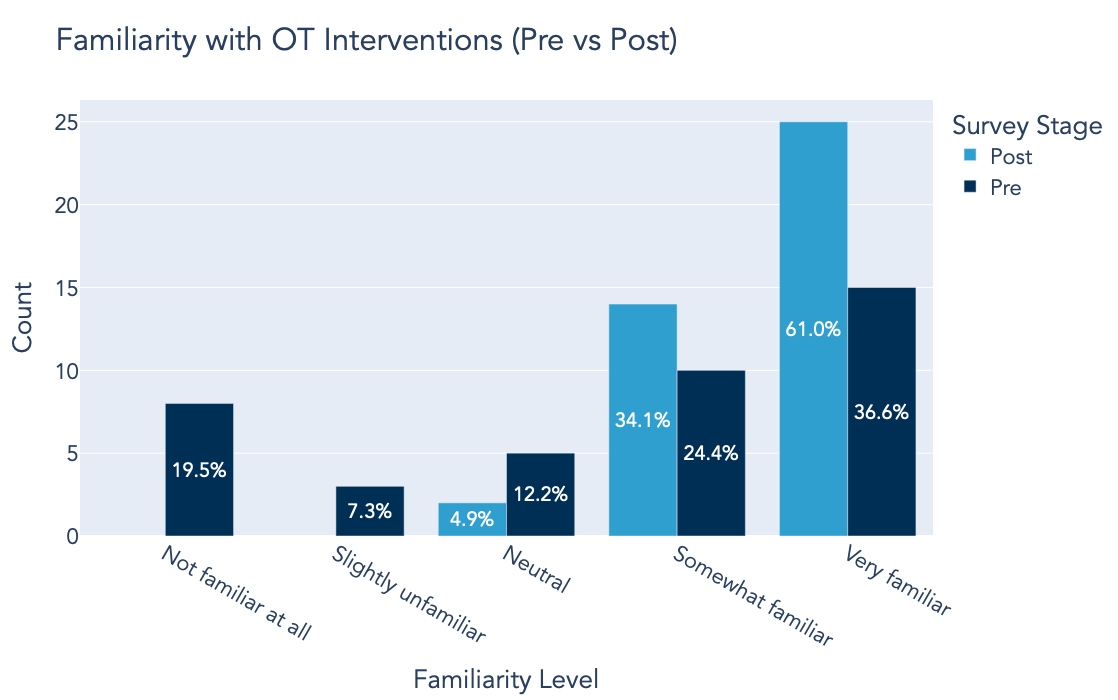

In [134]:
import plotly.express as px

fig_ot = px.bar(
    ot_counts,
    x="OT_Familiarity_Level",
    y="Count",
    color="Stage",
    barmode="group",
    text=ot_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    category_orders={"OT_Familiarity_Level": likert_order},
    color_discrete_map={"Pre": "#002f56", "Post": "#2f9fd0"},
    title="Familiarity with OT Interventions (Pre vs Post)"
)

fig_ot.update_traces(
    textfont=dict(family="Avenir", size=20, color="white"),
    textposition="inside",
    insidetextanchor="middle"
)

fig_ot.update_layout(
    xaxis_title="Familiarity Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=22),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700
)

fig_ot.show()


In [131]:
cd1 = merged_df["familiar_with_OT_pre"].value_counts().to_dict()
cd1

{'Very familiar': 15,
 'Somewhat familiar': 10,
 'Not familiar at all': 8,
 'Neutral': 5,
 'Slightly unfamiliar': 3}

In [132]:
cd2 = merged_df["familiar_with_OT_pre"].value_counts().to_dict()
cd2

{'Very familiar': 15,
 'Somewhat familiar': 10,
 'Not familiar at all': 8,
 'Neutral': 5,
 'Slightly unfamiliar': 3}

In [135]:
cd3 = merged_df["profession"].value_counts().to_dict()
cd3

{'Occupational Therapist Student': 20,
 'Hygenist': 6,
 'Occupational Therapist': 6,
 'Dental Student': 4,
 'Dentist': 3,
 'Hygiene Student': 1,
 'Other (please specify)': 1}

In [136]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table
ot_contingency = pd.crosstab(ot_comparison["OT_Familiarity_Level"], ot_comparison["Stage"])

print("Contingency Table:")
print(ot_contingency)

# Run chi-square test
chi2, p, dof, expected = chi2_contingency(ot_contingency)

print("\nChi-square Test Results")
print(f"Chi2 statistic = {chi2:.4f}")
print(f"Degrees of freedom = {dof}")
print(f"P-value = {p:.4f}")


Contingency Table:
Stage                 Post  Pre
OT_Familiarity_Level           
Neutral                  2    5
Not familiar at all      0    8
Slightly unfamiliar      0    3
Somewhat familiar       14   10
Very familiar           25   15

Chi-square Test Results
Chi2 statistic = 15.4524
Degrees of freedom = 4
P-value = 0.0038


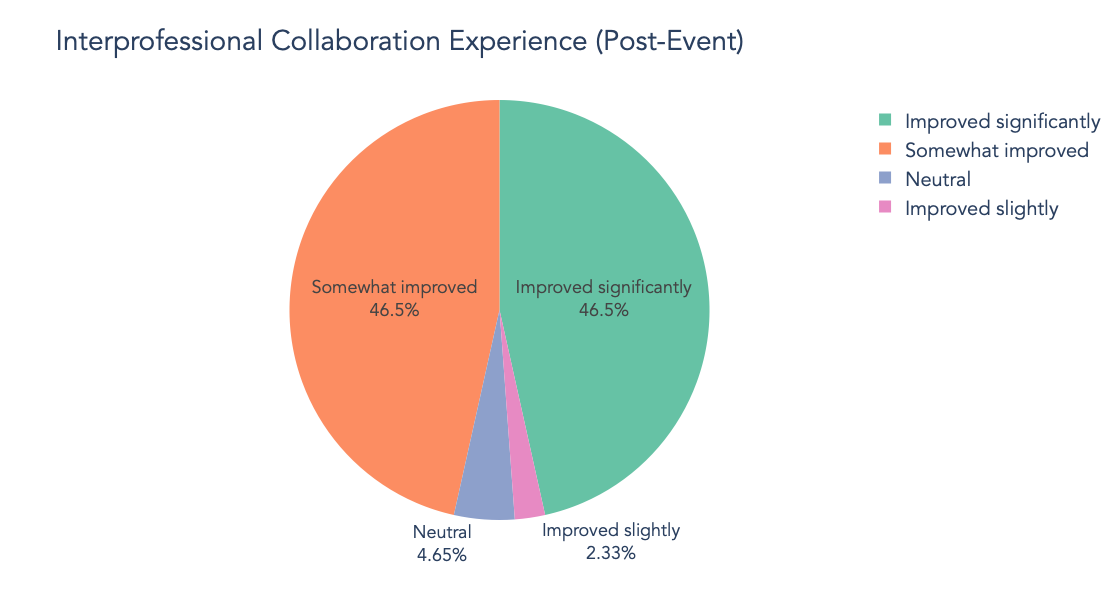

In [139]:
# post_final['IPC_experience_post']
import plotly.express as px

# Count responses
ipc_counts = post_final['IPC_experience_post'].value_counts().reset_index()
ipc_counts.columns = ["Response", "Count"]

# Pie chart
fig_ipc = px.pie(
    ipc_counts,
    names="Response",
    values="Count",
    title="Interprofessional Collaboration Experience (Post-Event)",
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Make labels readable
fig_ipc.update_traces(
    textinfo="percent+label",
    textfont=dict(family="Avenir", size=18)
)

fig_ipc.update_layout(
    font=dict(family="Avenir", size=20),
    width=800,
    height=600
)

fig_ipc.show()


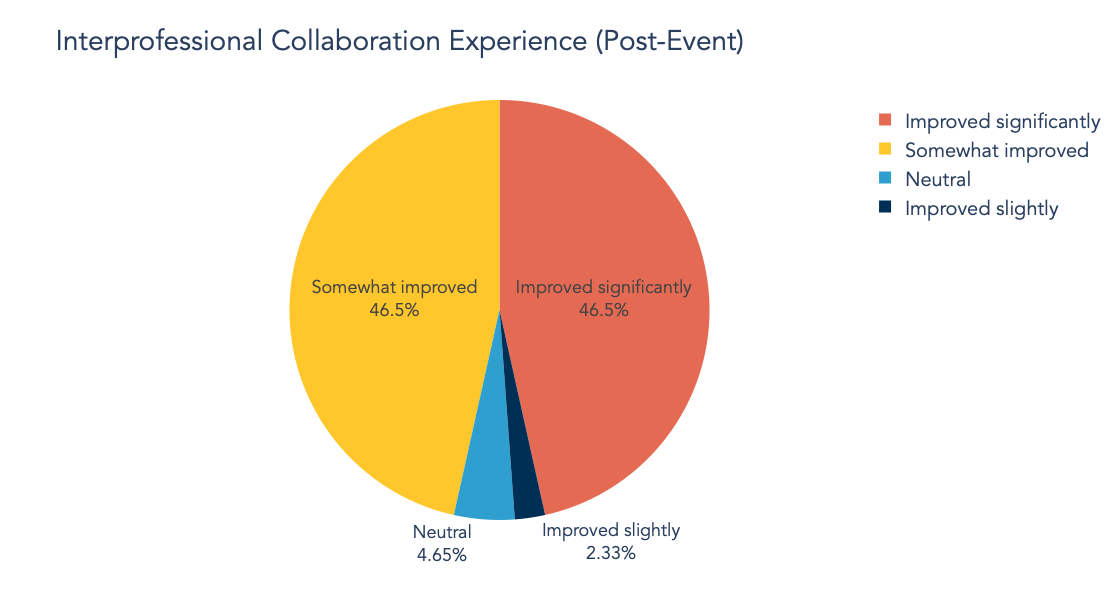

In [140]:
import plotly.express as px

# Count responses
ipc_counts = post_final['IPC_experience_post'].value_counts().reset_index()
ipc_counts.columns = ["Response", "Count"]

# Define custom color palette
custom_colors = ["#e56a54", "#ffc72c", "#2f9fd0", "#002f56"]

# Pie chart with fixed palette
fig_ipc = px.pie(
    ipc_counts,
    names="Response",
    values="Count",
    title="Interprofessional Collaboration Experience (Post-Event)",
    color_discrete_sequence=custom_colors
)

# Style labels
fig_ipc.update_traces(
    textinfo="percent+label",
    textfont=dict(family="Avenir", size=18)
)

fig_ipc.update_layout(
    font=dict(family="Avenir", size=20),
    width=800,
    height=600
)

fig_ipc.show()


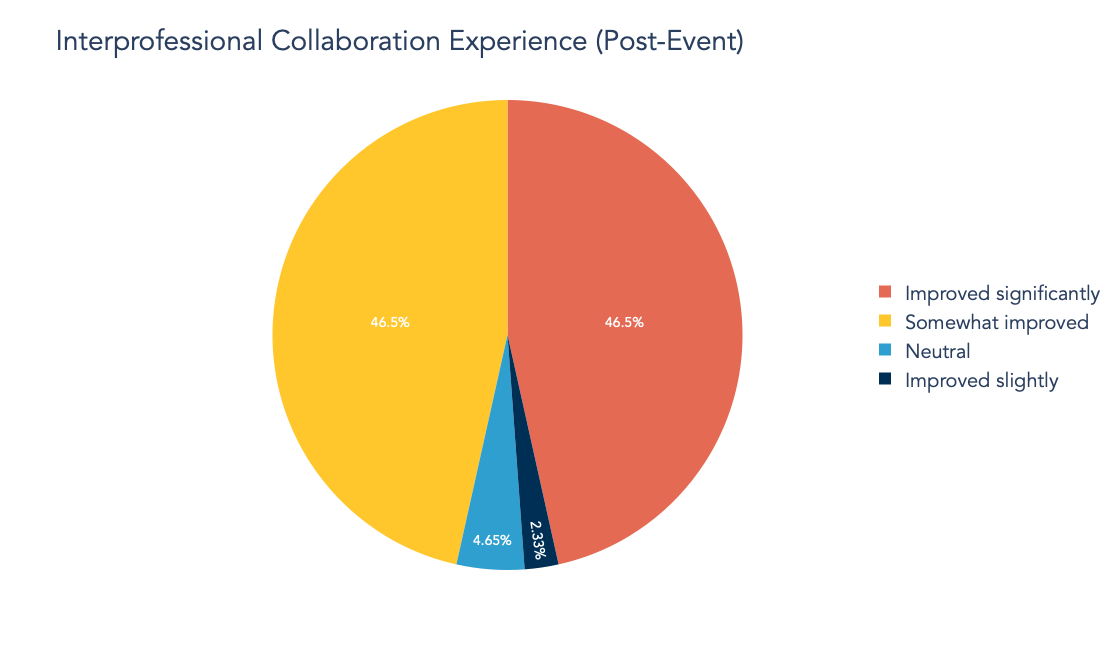

In [143]:
import plotly.express as px

# Count responses
ipc_counts = post_final['IPC_experience_post'].value_counts().reset_index()
ipc_counts.columns = ["Response", "Count"]

# Define custom color palette
custom_colors = ["#e56a54", "#ffc72c", "#2f9fd0", "#002f56"]

# Pie chart
fig_ipc = px.pie(
    ipc_counts,
    names="Response",
    values="Count",
    title="Interprofessional Collaboration Experience (Post-Event)",
    color_discrete_sequence=custom_colors
)

# Style slices and text
fig_ipc.update_traces(
    textinfo="percent",
    textfont=dict(family="Avenir", size=14, color="white"),      # 👈 smaller % inside slices
    insidetextfont=dict(family="Avenir", size=14, color="white") # 👈 force smaller inside
)

# Layout: legend outside
fig_ipc.update_layout(
    font=dict(family="Avenir", size=20),  # general chart font
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="right",
        x=1.2  # pushes legend outside
    ),
    width=1000,
    height=650
)

fig_ipc.show()


In [144]:
post_final['IPC_experience_post'].value_counts()

IPC_experience_post
Improved significantly    20
Somewhat improved         20
Neutral                    2
Improved slightly          1
Name: count, dtype: int64

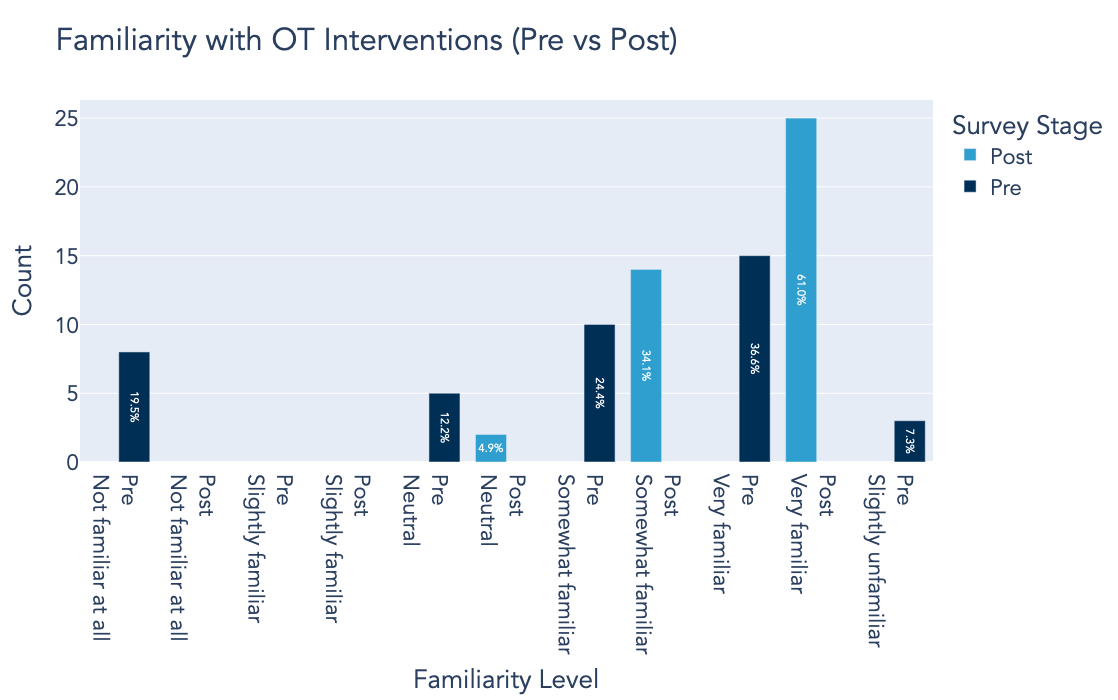

In [147]:
import plotly.express as px

# Build combined column for x-axis
ot_counts["Stage_Level"] = ot_counts["Stage"] + "<br>" + ot_counts["OT_Familiarity_Level"]

# Define order for combined labels
ot_order = [
    "Pre<br>Not familiar at all", "Post<br>Not familiar at all",
    "Pre<br>Slightly familiar", "Post<br>Slightly familiar",
    "Pre<br>Neutral", "Post<br>Neutral",
    "Pre<br>Somewhat familiar", "Post<br>Somewhat familiar",
    "Pre<br>Very familiar", "Post<br>Very familiar"
]

# Plot using Stage_Level
fig_ot = px.bar(
    ot_counts,
    x="Stage_Level",
    y="Count",
    color="Stage",
    barmode="group",
    text=ot_counts["Percentage"].map(lambda x: f"{x:.1f}%"),
    category_orders={"Stage_Level": ot_order},
    color_discrete_map={"Pre": "#002f56", "Post": "#2f9fd0"},
    title="Familiarity with OT Interventions (Pre vs Post)"
)

# Styling
fig_ot.update_traces(
    textfont=dict(family="Avenir", size=20, color="white"),
    textposition="inside",
    insidetextanchor="middle"
)

fig_ot.update_layout(
    xaxis_title="Familiarity Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=22),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1200,
    height=700
)

fig_ot.show()


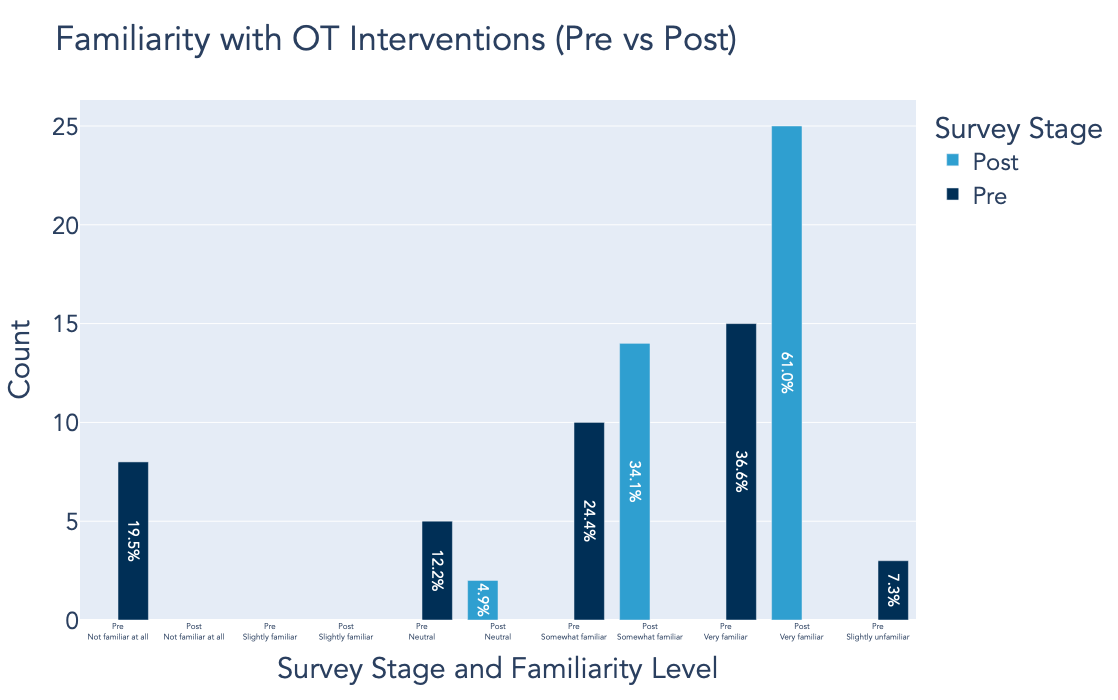

In [148]:
fig_ot.update_layout(
    xaxis_title="Survey Stage and Familiarity Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1100,
    height=700,
    xaxis=dict(
        tickangle=0,   # 👈 keep labels horizontal,
        tickfont=dict(size=8, family="Avenir")  
    )
)


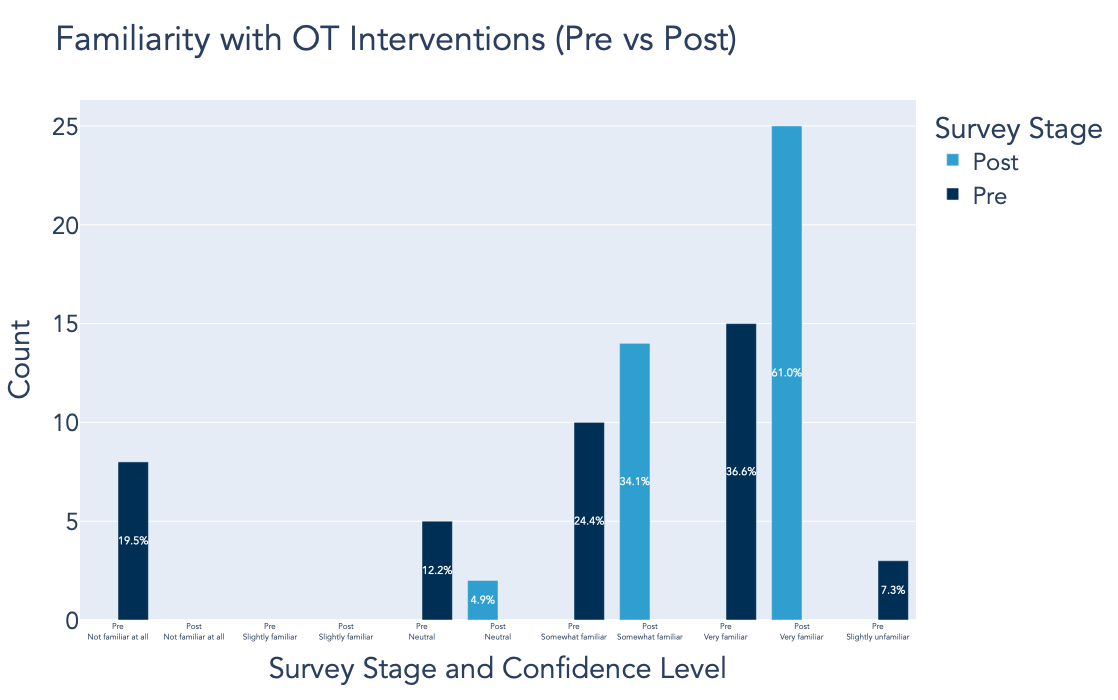

In [151]:
fig_ot.update_traces(
    textfont=dict(family="Avenir", size=18, color="white"),
    textposition="inside",
    textangle=0,       # 👈 rotate % labels vertically
    insidetextanchor="middle"
)

fig_ot.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1100,
    height=700,
    xaxis=dict(
        tickangle=0,
        tickfont=dict(size=8, family="Avenir")
    )
)


In [152]:
# comfort_level_IDD_post

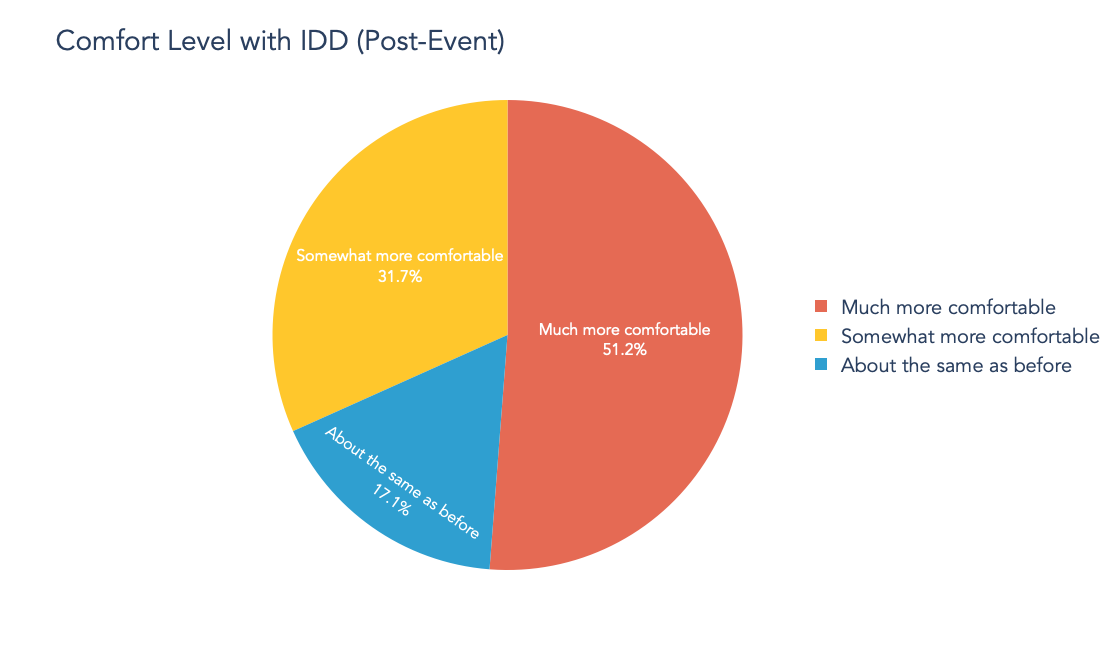

In [156]:
import plotly.express as px

# Count responses
comfort_counts = merged_df['comfort_level_IDD_post'].value_counts().reset_index()
comfort_counts.columns = ["Response", "Count"]

# Sort so largest categories first
comfort_counts = comfort_counts.sort_values("Count", ascending=False).reset_index(drop=True)

# Assign colors: top 2 → red/yellow, rest → blues
custom_colors = ["#e56a54", "#ffc72c", "#2f9fd0", "#002f56"][:len(comfort_counts)]

# Pie chart
fig_comfort = px.pie(
    comfort_counts,
    names="Response",
    values="Count",
    title="Comfort Level with IDD (Post-Event)",
    color_discrete_sequence=custom_colors
)

# Style labels
fig_comfort.update_traces(
    textinfo="percent+label",
    textfont=dict(family="Avenir", size=16, color="white")
)

# Legend outside
fig_comfort.update_layout(
    font=dict(family="Avenir", size=20),
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="right",
        x=1.2
    ),
    width=1100,
    height=650
)

fig_comfort.show()


In [163]:
import plotly.express as px

fig_loc = px.bar(
    merged_df["location_x"].value_counts().reset_index(),
    x="index",
    y="location_x",
    text="location_x",
    color="index",
    color_discrete_sequence=["#002f56", "#2f9fd0", "#ffc72c", "#e56a54"],
    title="Number of Participants by Location"
)

fig_loc.update_traces(textposition="outside")
fig_loc.update_layout(
    xaxis_title="Location",
    yaxis_title="Count",
    font=dict(family="Avenir", size=18),
    showlegend=False
)

fig_loc.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['location_x', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

In [161]:
merged_df.columns

Index(['Respondent ID_x', 'Collector ID_x', 'Start Date_x', 'End Date_x',
       'IP Address_x', 'name', 'ID#_x', 'location_x',
       'participation_frequency', 'age_group', 'profession', 'Unnamed: 11',
       'training_level', 'recieved_training_IDD', 'has_experience_IDD',
       'experience_IDD_count', 'interaction_frequency_IDD',
       'comfort_level_IDD_pre', 'PersonCenteredCare_InPractice_pre',
       'BPS_knowledge_pre', 'SBAR_familiar_pre', 'familiar_with_OT_pre',
       'familiar_with_IPC_pre', 'prep_for_collaboration_pre',
       'prior_IPC_experience_pre', 'yes_other', 'Unnamed: 26_x',
       'Unnamed: 27_x', 'prior_IPC_experience_time',
       'frequency_collaboration_pre',
       'How important is it for you to establish trust with other healthcare providers to provide high-quality care for patients?',
       'Respondent ID_y', 'Collector ID_y', 'Start Date_y', 'End Date_y',
       'IP Address_y', 'Unnamed: 5', 'ID#_y', 'location_y', 'new_exposure_IDD',
       'comfort_le

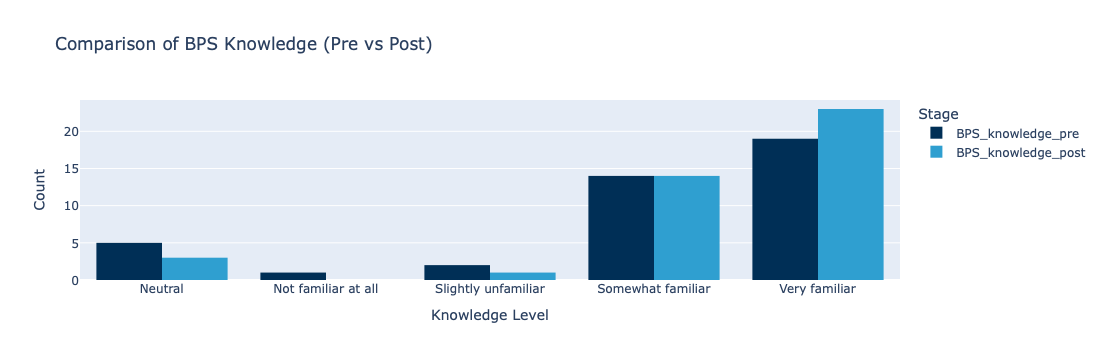

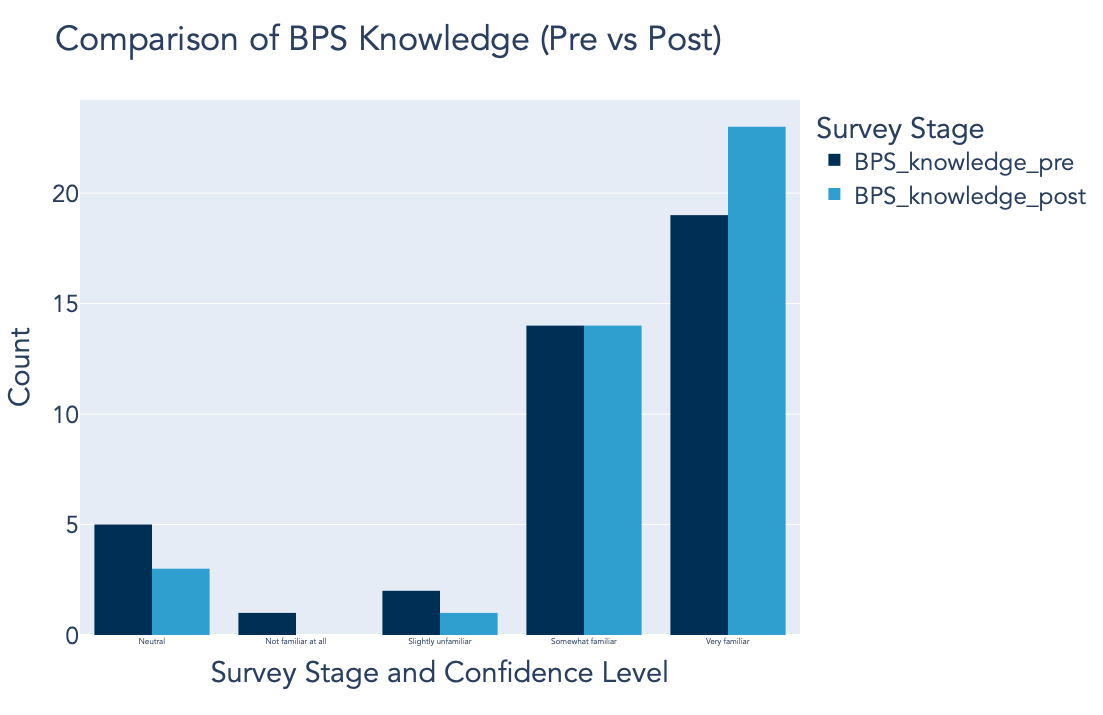

In [165]:
# Side-by-side comparison
comparison = merged_df.melt(
    id_vars=["name"], 
    value_vars=["BPS_knowledge_pre", "BPS_knowledge_post"],
    var_name="Stage", 
    value_name="Knowledge_Level"
)

fig3 = px.histogram(
    comparison,
    x="Knowledge_Level",
    color="Stage",
    barmode="group",
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",   # blue
        "BPS_knowledge_post": "#2f9fd0"   # teal
    },
    title="Comparison of BPS Knowledge (Pre vs Post)"
)
fig3.update_layout(xaxis_title="Knowledge Level", yaxis_title="Count")
fig3.show()
fig3.update_traces(
    textfont=dict(family="Avenir", size=18, color="white"),
    textposition="inside",
    textangle=0,       # 👈 rotate % labels vertically
    insidetextanchor="middle"
)

fig3.update_layout(
    xaxis_title="Survey Stage and Confidence Level",
    yaxis_title="Count",
    font=dict(family="Avenir", size=24),
    legend_title="Survey Stage",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1100,
    height=700,
    xaxis=dict(
        tickangle=0,
        tickfont=dict(size=8, family="Avenir")
    )
)


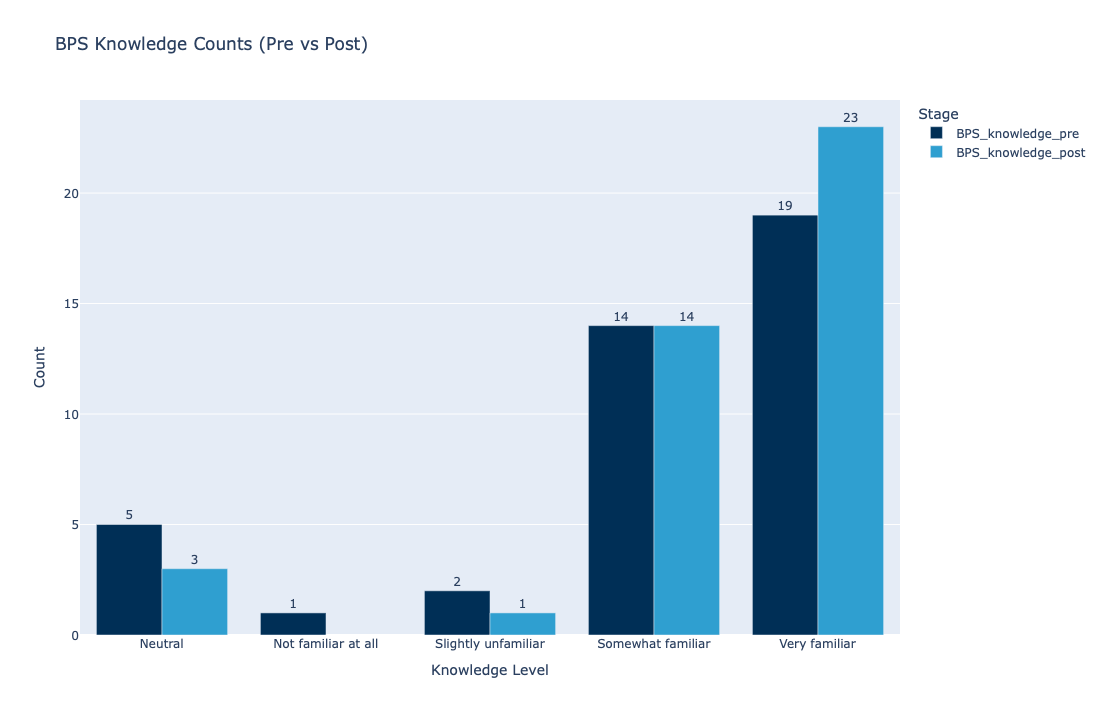

In [167]:
import pandas as pd
import plotly.express as px

# Count responses
counts = (
    comparison
    .groupby(["Stage", "Knowledge_Level"], dropna=False)
    .size()
    .reset_index(name="Count")
)

# Percent within each Stage
counts["Percent"] = (
    counts.groupby("Stage")["Count"]
    .transform(lambda x: 100 * x / x.sum())
)

import plotly.express as px

stage_order = ["BPS_knowledge_pre", "BPS_knowledge_post"]

fig_count = px.bar(
    counts,
    x="Knowledge_Level",
    y="Count",                # 👈 now vertical bars
    color="Stage",
    text="Count",             # 👈 show counts
    barmode="group",
    category_orders={"Stage": stage_order},
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",
        "BPS_knowledge_post": "#2f9fd0"
    },
    title="BPS Knowledge Counts (Pre vs Post)"
)

fig_count.update_traces(textposition="outside")
fig_count.update_layout(
    xaxis_title="Knowledge Level",
    yaxis_title="Count",
    width=1100,
    height=700
)
fig_count.show()


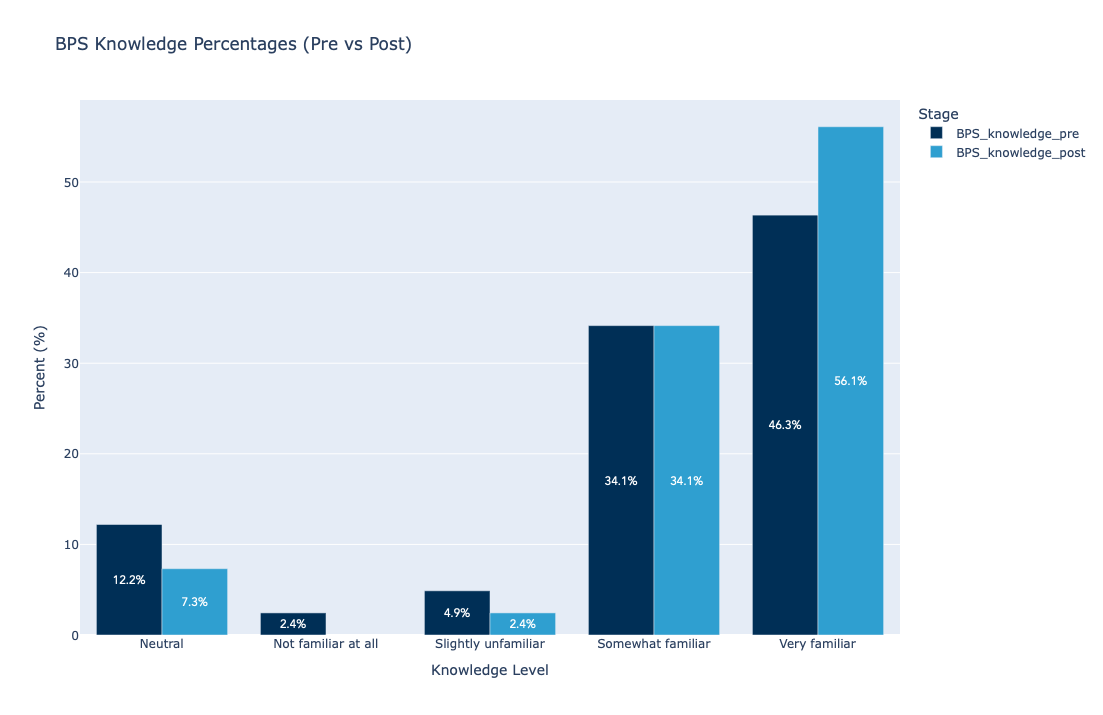

In [168]:
# Assuming you already built `counts` and `fig_percent` like before:
fig_percent = px.bar(
    counts,
    x="Knowledge_Level",
    y="Percent",
    color="Stage",
    barmode="group",
    category_orders={"Stage": ["BPS_knowledge_pre", "BPS_knowledge_post"]},
    color_discrete_map={
        "BPS_knowledge_pre": "#002f56",
        "BPS_knowledge_post": "#2f9fd0"
    },
    title="BPS Knowledge Percentages (Pre vs Post)"
)

# ✅ Put % ON each bar, in white
fig_percent.update_traces(
    texttemplate="%{y:.1f}%",
    textposition="inside",
    insidetextanchor="middle",
    textfont=dict(family="Avenir", size=16, color="white")
)

fig_percent.update_layout(
    xaxis_title="Knowledge Level",
    yaxis_title="Percent (%)",
    uniformtext_minsize=10,
    uniformtext_mode="show",
    width=1100,
    height=700
)

fig_percent.show()
